# shap_testing9.ipynb
4/5/24

We now have some of the global analysis results, let's look at them

In [1]:
#just with the 2 models, compare the CREs
#now we can use the same structure we had before and repeat the same utils, but the benefit is that we can do both classification and regression!!

from shap_analysis.ism_utils import *
multitasking_path1 = '/data/leslie/sarthak/hyena/hyena-dna/outputs/2024-03-27/18-39-11-031863/checkpoints/25-val_loss=0.52186.ckpt' #the 25 epoch one
ctst_path = '/data/leslie/sarthak/hyena/hyena-dna/outputs/2024-03-25/15-41-13-286486/checkpoints/last.ckpt'

ctst = ISMUtils('DNase_ctst', ctst_path, classification=True) #split is train
mult = ISMUtils('DNase_allcelltypes', multitasking_path1, classification=True) #split is train

In [5]:
#let's now look at some of the known ctst data points
#let's just look at this one train/ctst_bestepoch_421939_class.npy
import numpy as np
ctst_421939_class = np.load('/data/leslie/sarthak/hyena/hyena-dna/shap_analysis/most_variable_cCREs2/train/ctst_bestepoch_421939_class.npy')
ctst_421939_reg = np.load('/data/leslie/sarthak/hyena/hyena-dna/shap_analysis/most_variable_cCREs2/train/ctst_bestepoch_421939_reg.npy')
mult_421939_class = np.load('/data/leslie/sarthak/hyena/hyena-dna/shap_analysis/most_variable_cCREs2/train/multitasking_25epoch_421939_class.npy')
mult_421939_reg = np.load('/data/leslie/sarthak/hyena/hyena-dna/shap_analysis/most_variable_cCREs2/train/multitasking_25epoch_421939_reg.npy')
#print all the shapes
print(ctst_421939_class.shape, ctst_421939_reg.shape, mult_421939_class.shape, mult_421939_reg.shape)

(4, 1024, 161) (4, 1024, 161) (4, 1023, 161) (4, 1023, 161)


In [8]:
idx = 421939
true_values = mult.dataset[idx][1][1] #the first 1 is results, then the second 1 is regression
print(true_values,true_values.shape)

tensor([-10.0000,  -1.4501,  -1.1259,  -1.8961,  -1.7819,  -1.2194,  -1.2931,
         -1.2899, -10.0000,  -1.3818,  -1.9544,  -1.5832,  -1.0475,  -1.4130,
         -1.2169,  -1.3799, -10.0000,  -0.7649,  -0.6899,  -2.4107,  -1.5092,
         -1.0064, -10.0000, -10.0000,  -1.8506,  -0.4867,  -2.5255,  -0.6599,
         -1.7878, -10.0000,  -1.7415,  -0.8689,  -2.0247, -10.0000,  -1.9561,
         -2.2125,  -1.4664,  -1.5593,  -0.7741,  -0.7792, -10.0000, -10.0000,
         -0.6541,   0.0984, -10.0000,  -0.1264,  -1.0439,  -0.6084, -10.0000,
         -0.5371, -10.0000, -10.0000,  -2.9540,  -1.0032,  -0.7992,  -0.9751,
         -0.9745,  -0.6730,  -1.3781, -10.0000,  -0.7565, -10.0000,  -0.0422,
         -0.6184,  -0.4056,  -0.6977,  -0.7660,  -0.7809,  -1.6643, -10.0000,
         -2.0254,  -1.4434, -10.0000, -10.0000,  -1.5518,  -0.5539,  -0.7012,
         -1.0671,  -0.7018,  -1.2088, -10.0000,  -0.6731,  -0.2229,  -0.9975,
         -1.1849,  -0.9470,  -1.2867,  -1.1723,  -1.0569, -10.00

In [15]:
results_list = [ctst_421939_class, mult_421939_class, ctst_421939_reg, mult_421939_reg]
utils_list = [ctst, mult, ctst, mult]
name_list = ['ctst_class', 'multitasking_class', 'ctst_reg', 'multitasking_reg']

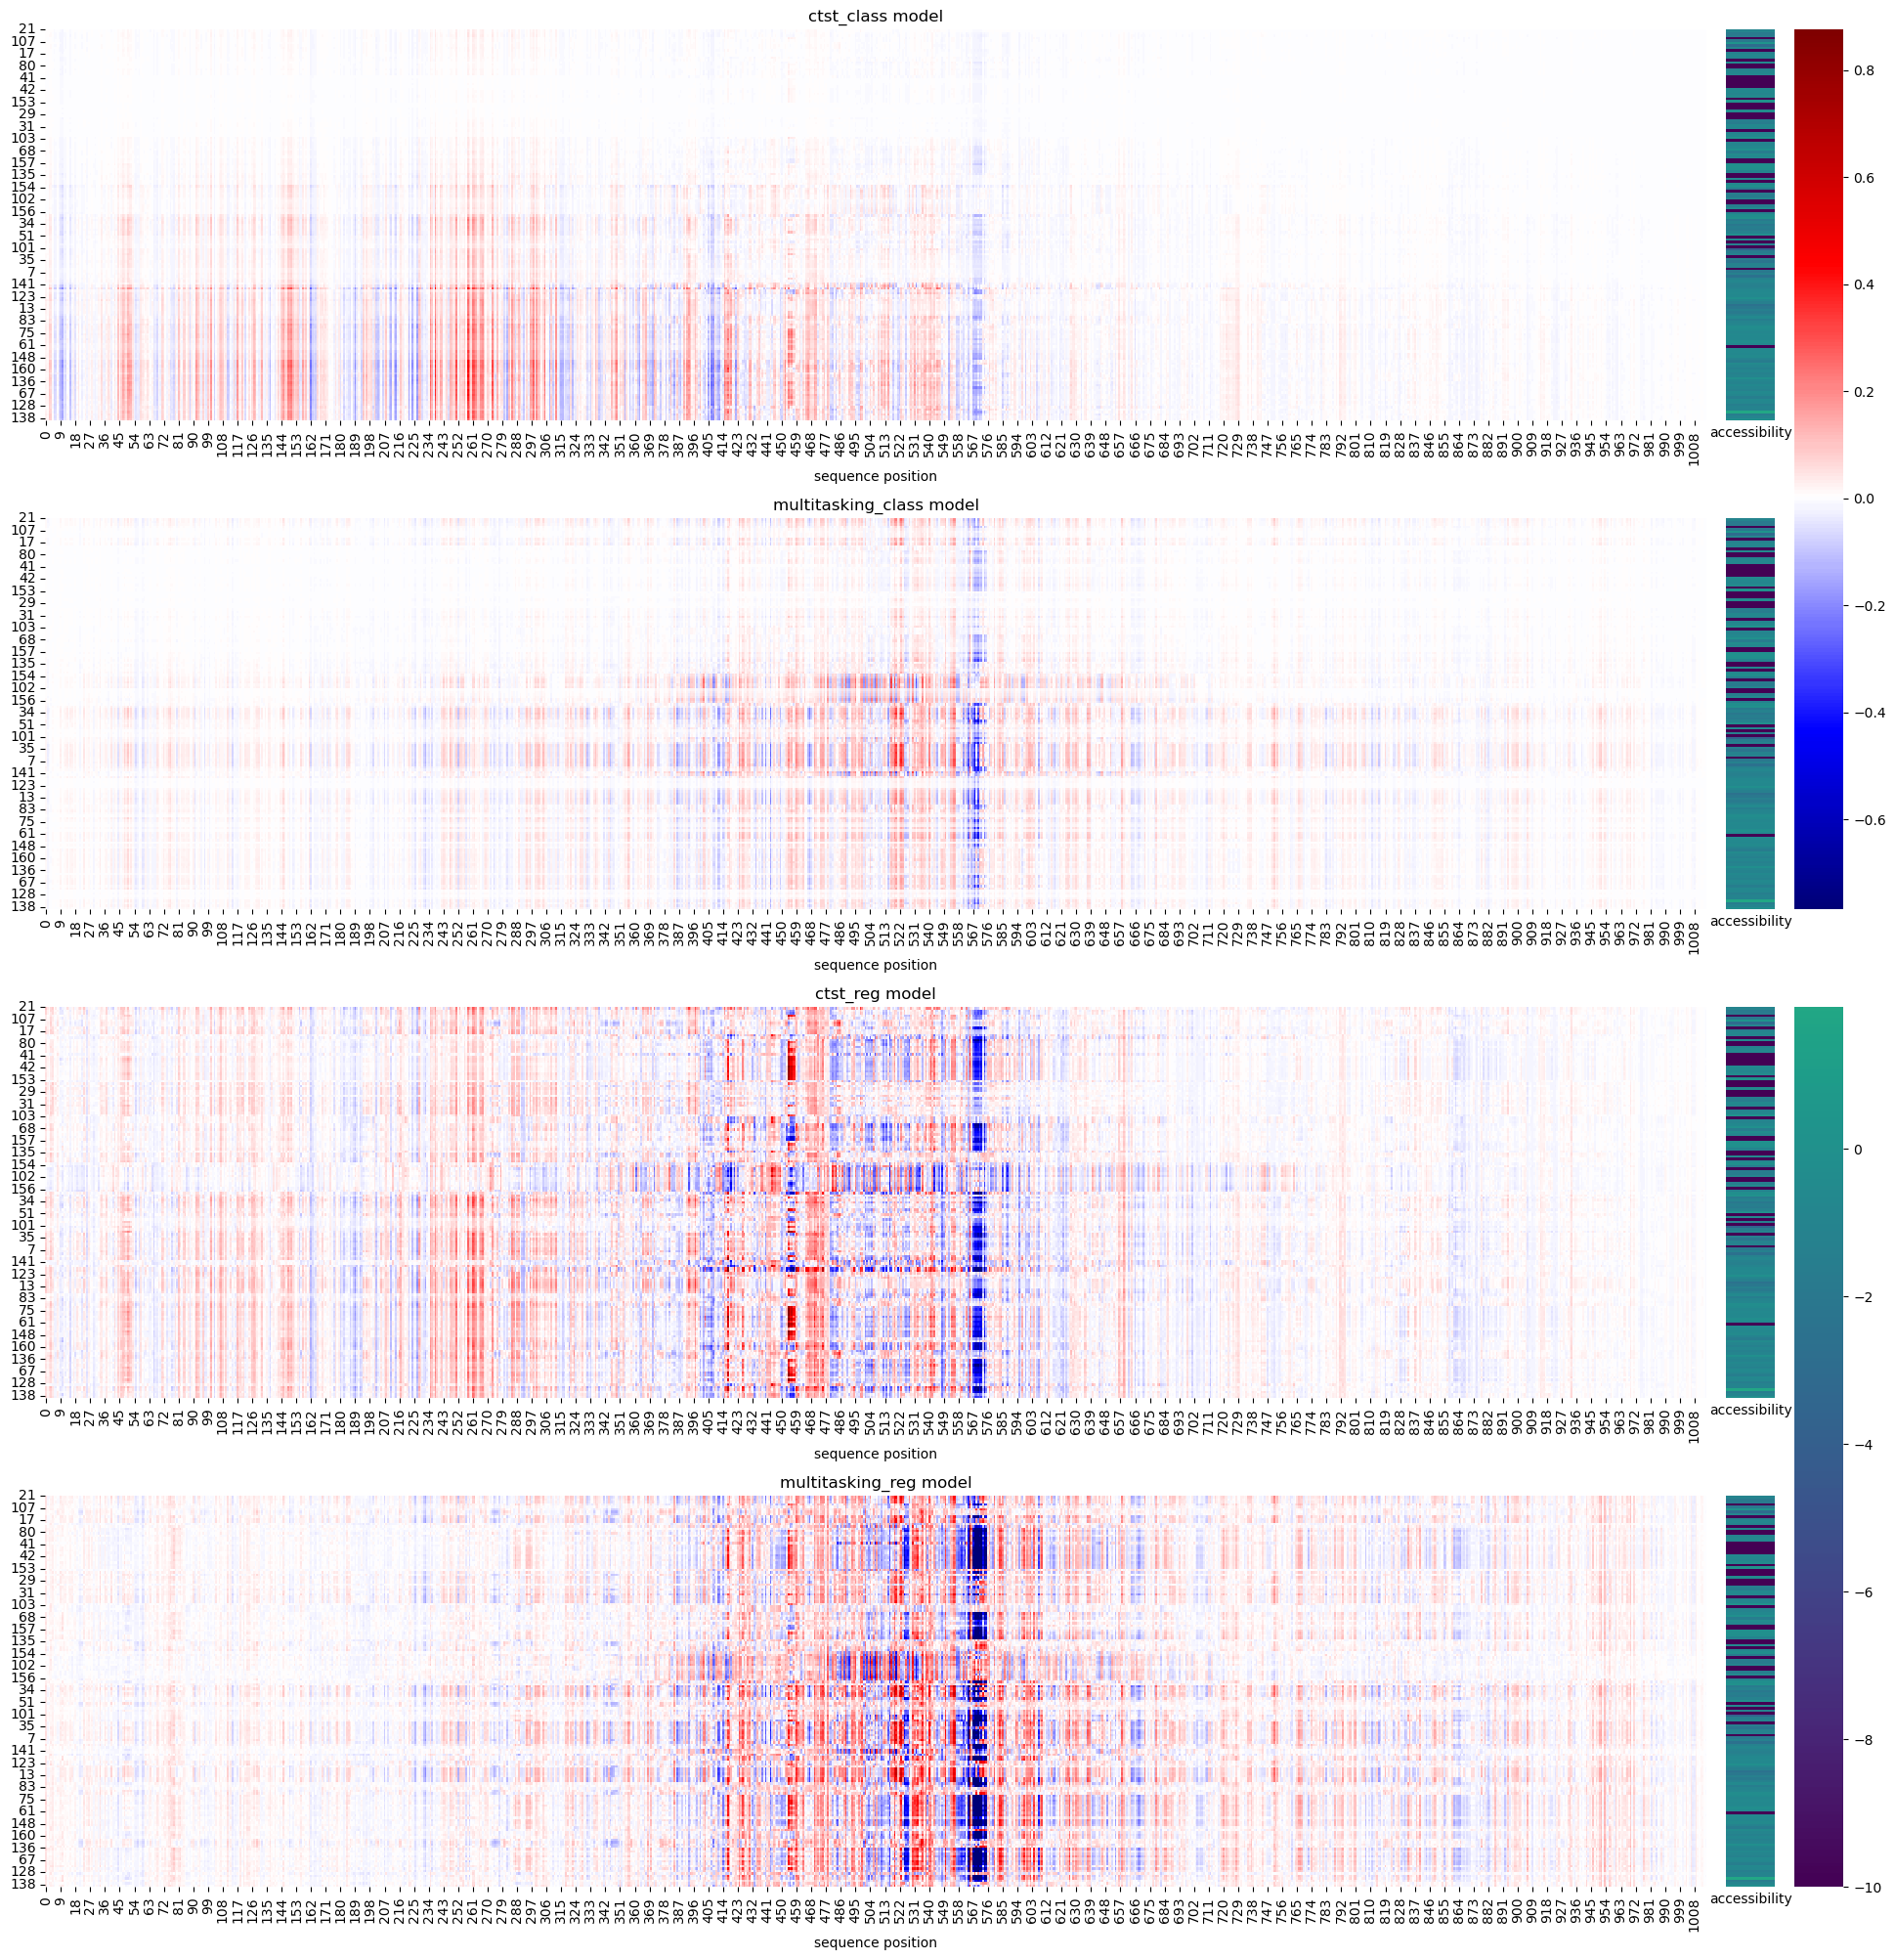

In [17]:
multi_cluster(results_list, true_values, name_list, utils_list)

(<Figure size 1500x1500 with 5 Axes>,
 array([<Axes: title={'center': 'AG10803'}>,
        <Axes: title={'center': 'A172'}>,
        <Axes: title={'center': 'L1-S8'}>,
        <Axes: title={'center': 'retinal_pigment_epithelial_cell'}>,
        <Axes: title={'center': 'D721Med'}>], dtype=object))

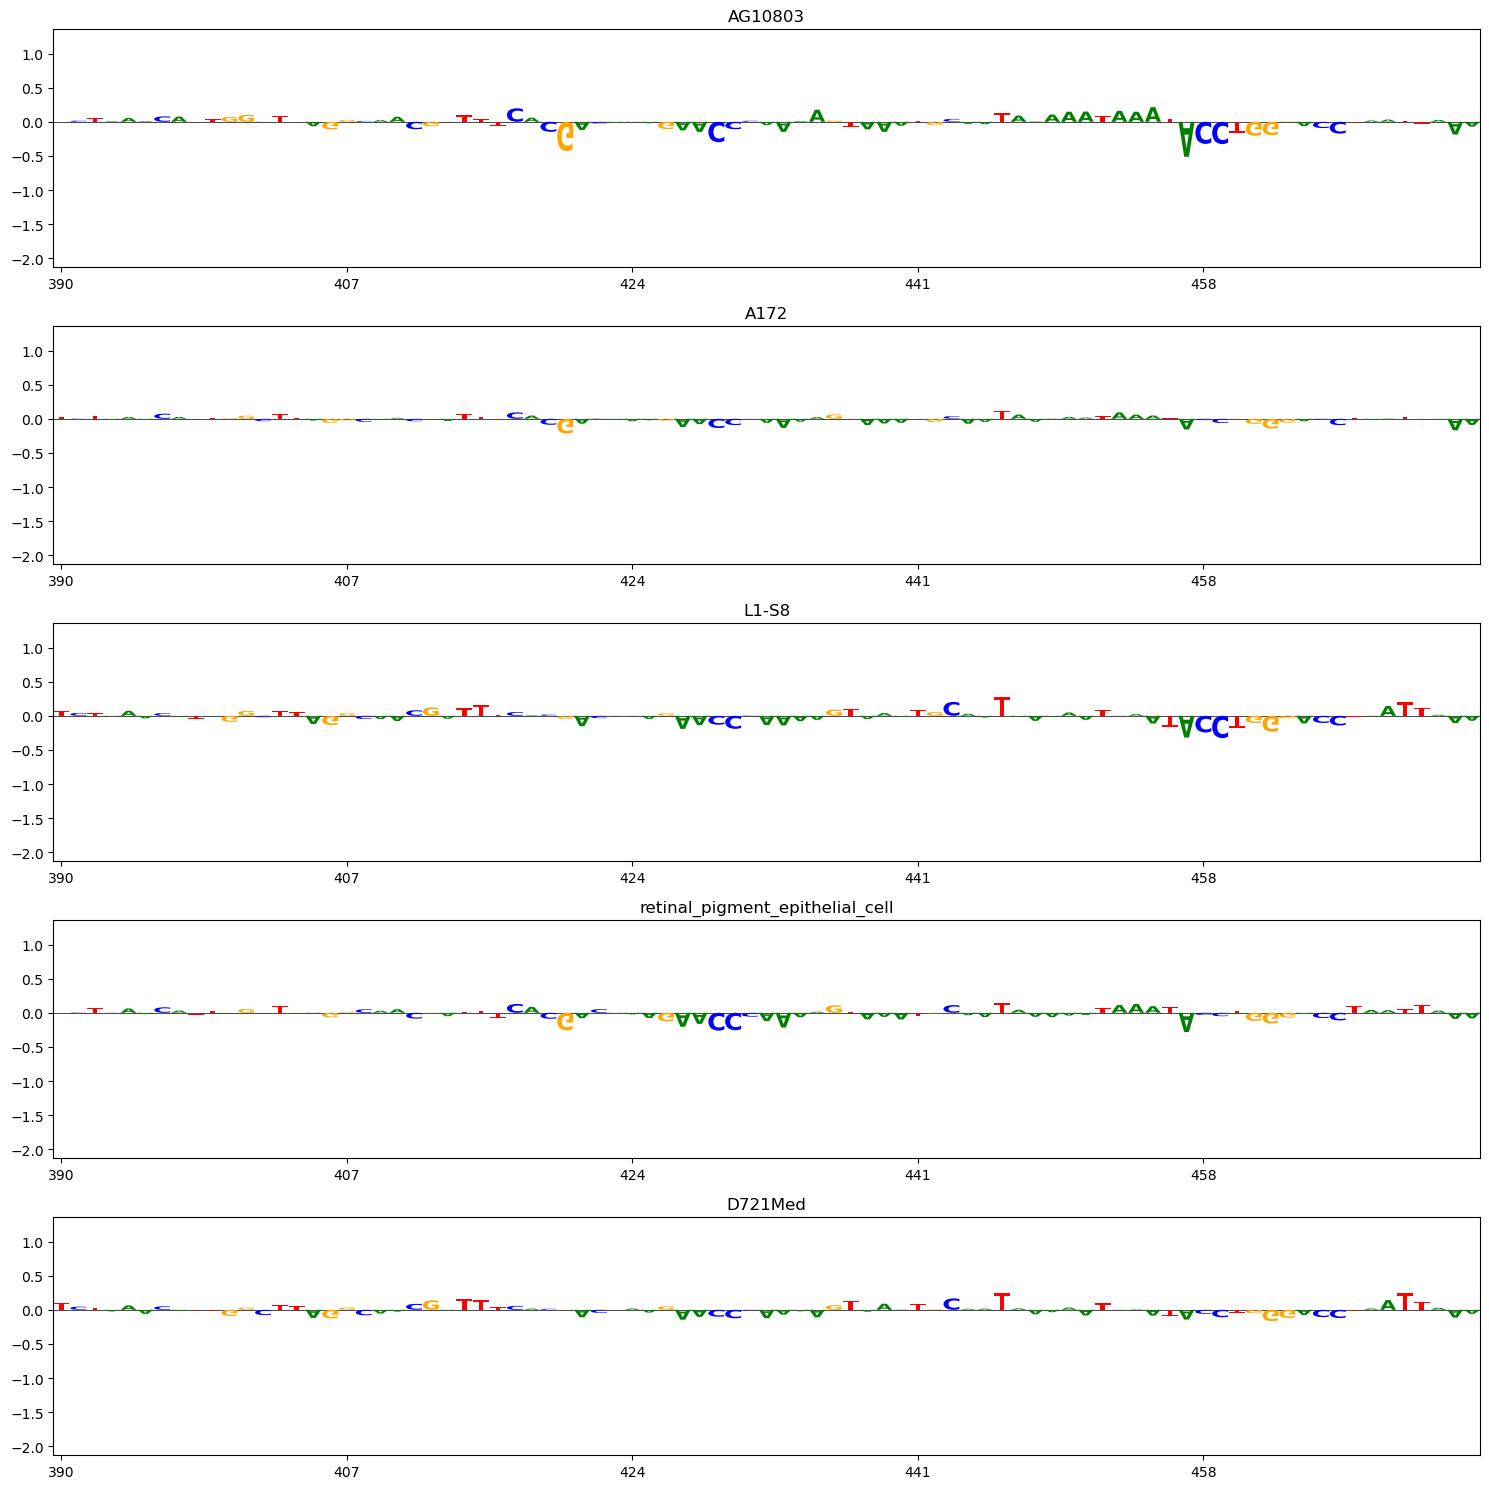

In [24]:
#now use multi logo on 440 to 470
#we also need a nice way to find some of the vlues that are high and some that are low
idxs = [42,157, 123, 80, 29]
celltype_logo(mult,idx, idxs, mult_421939_reg.sum(0),startend=(390,475))

(<Figure size 1500x1500 with 5 Axes>,
 array([<Axes: title={'center': 'AG10803'}>,
        <Axes: title={'center': 'A172'}>,
        <Axes: title={'center': 'L1-S8'}>,
        <Axes: title={'center': 'retinal_pigment_epithelial_cell'}>,
        <Axes: title={'center': 'D721Med'}>], dtype=object))

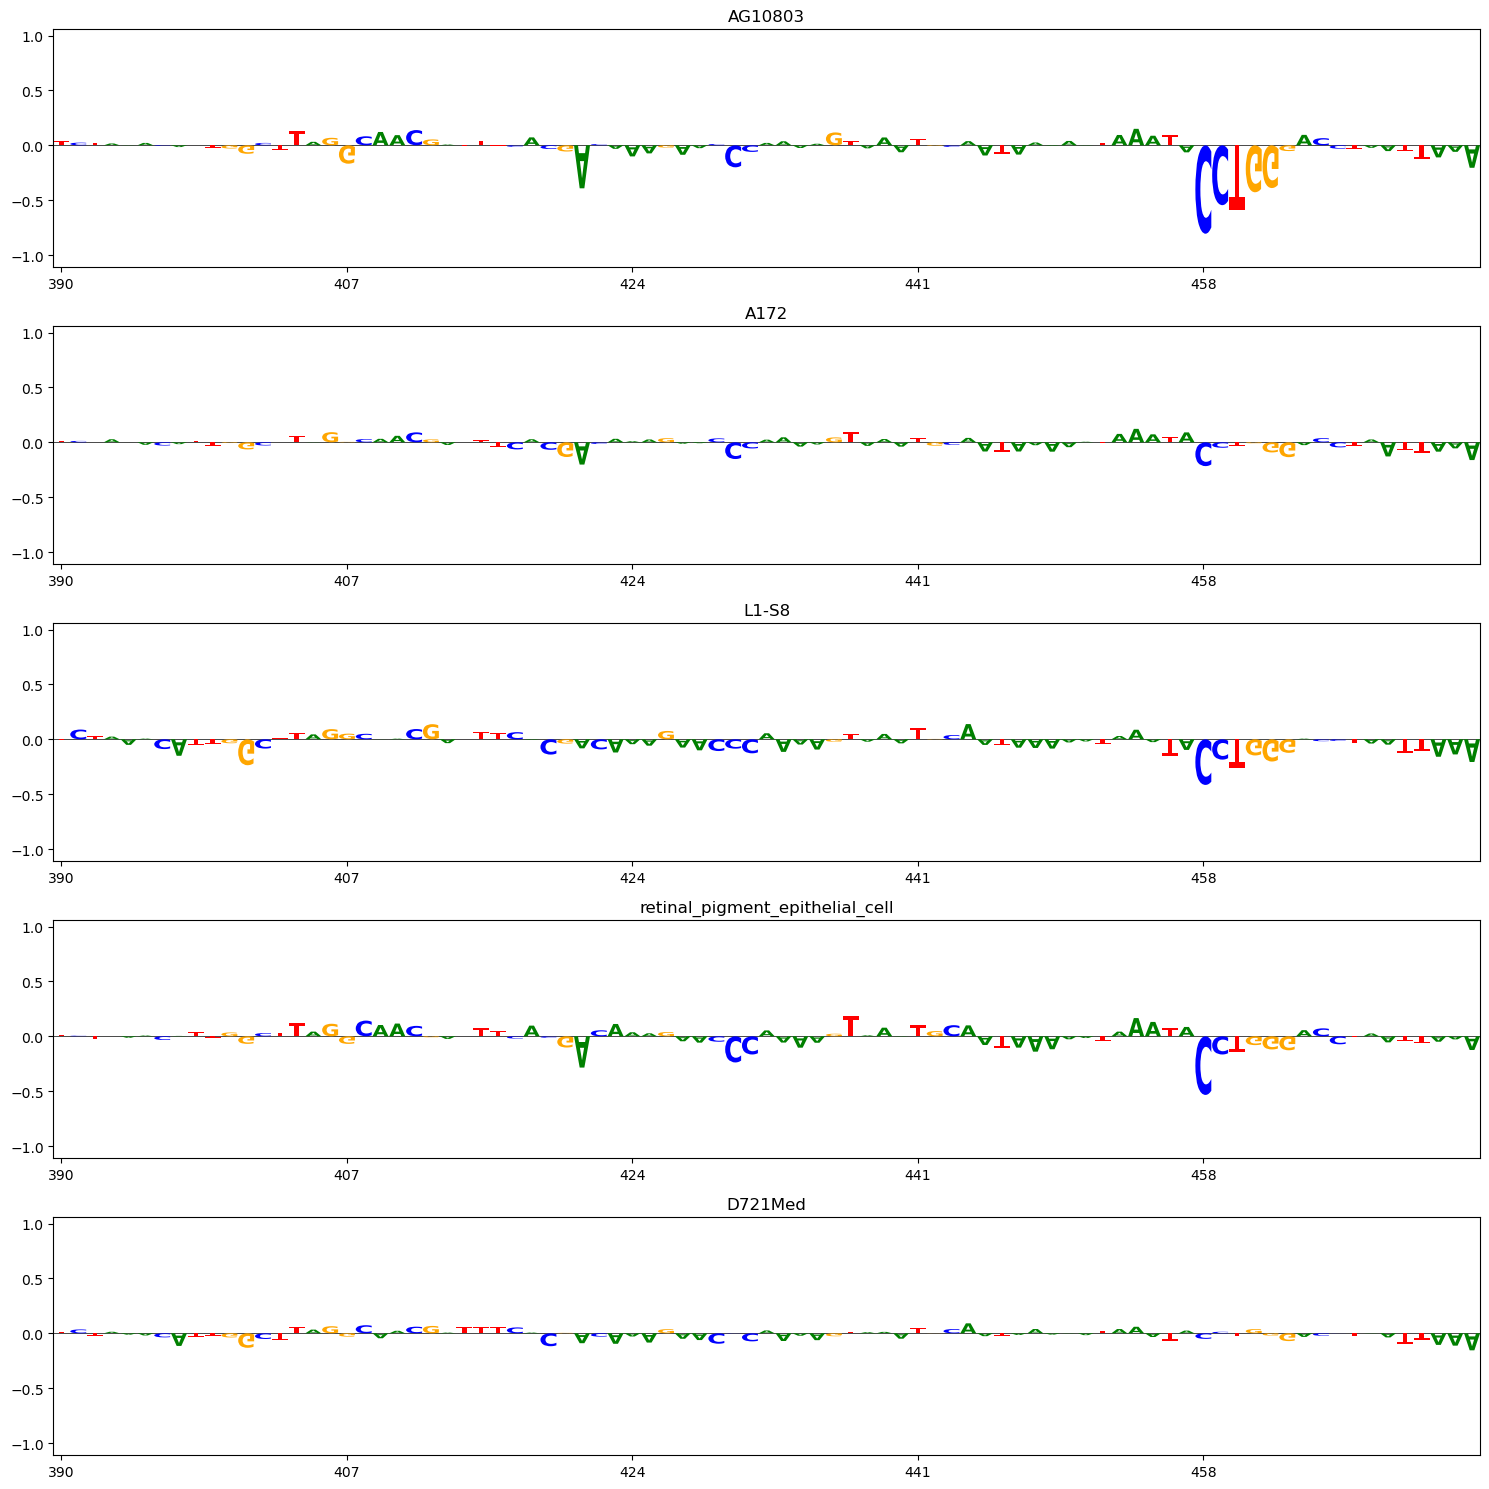

In [25]:
celltype_logo(ctst,idx, idxs, ctst_421939_reg.sum(0),startend=(390,475))

(<Figure size 1500x1500 with 5 Axes>,
 array([<Axes: title={'center': 'AG10803'}>,
        <Axes: title={'center': 'A172'}>,
        <Axes: title={'center': 'L1-S8'}>,
        <Axes: title={'center': 'retinal_pigment_epithelial_cell'}>,
        <Axes: title={'center': 'D721Med'}>], dtype=object))

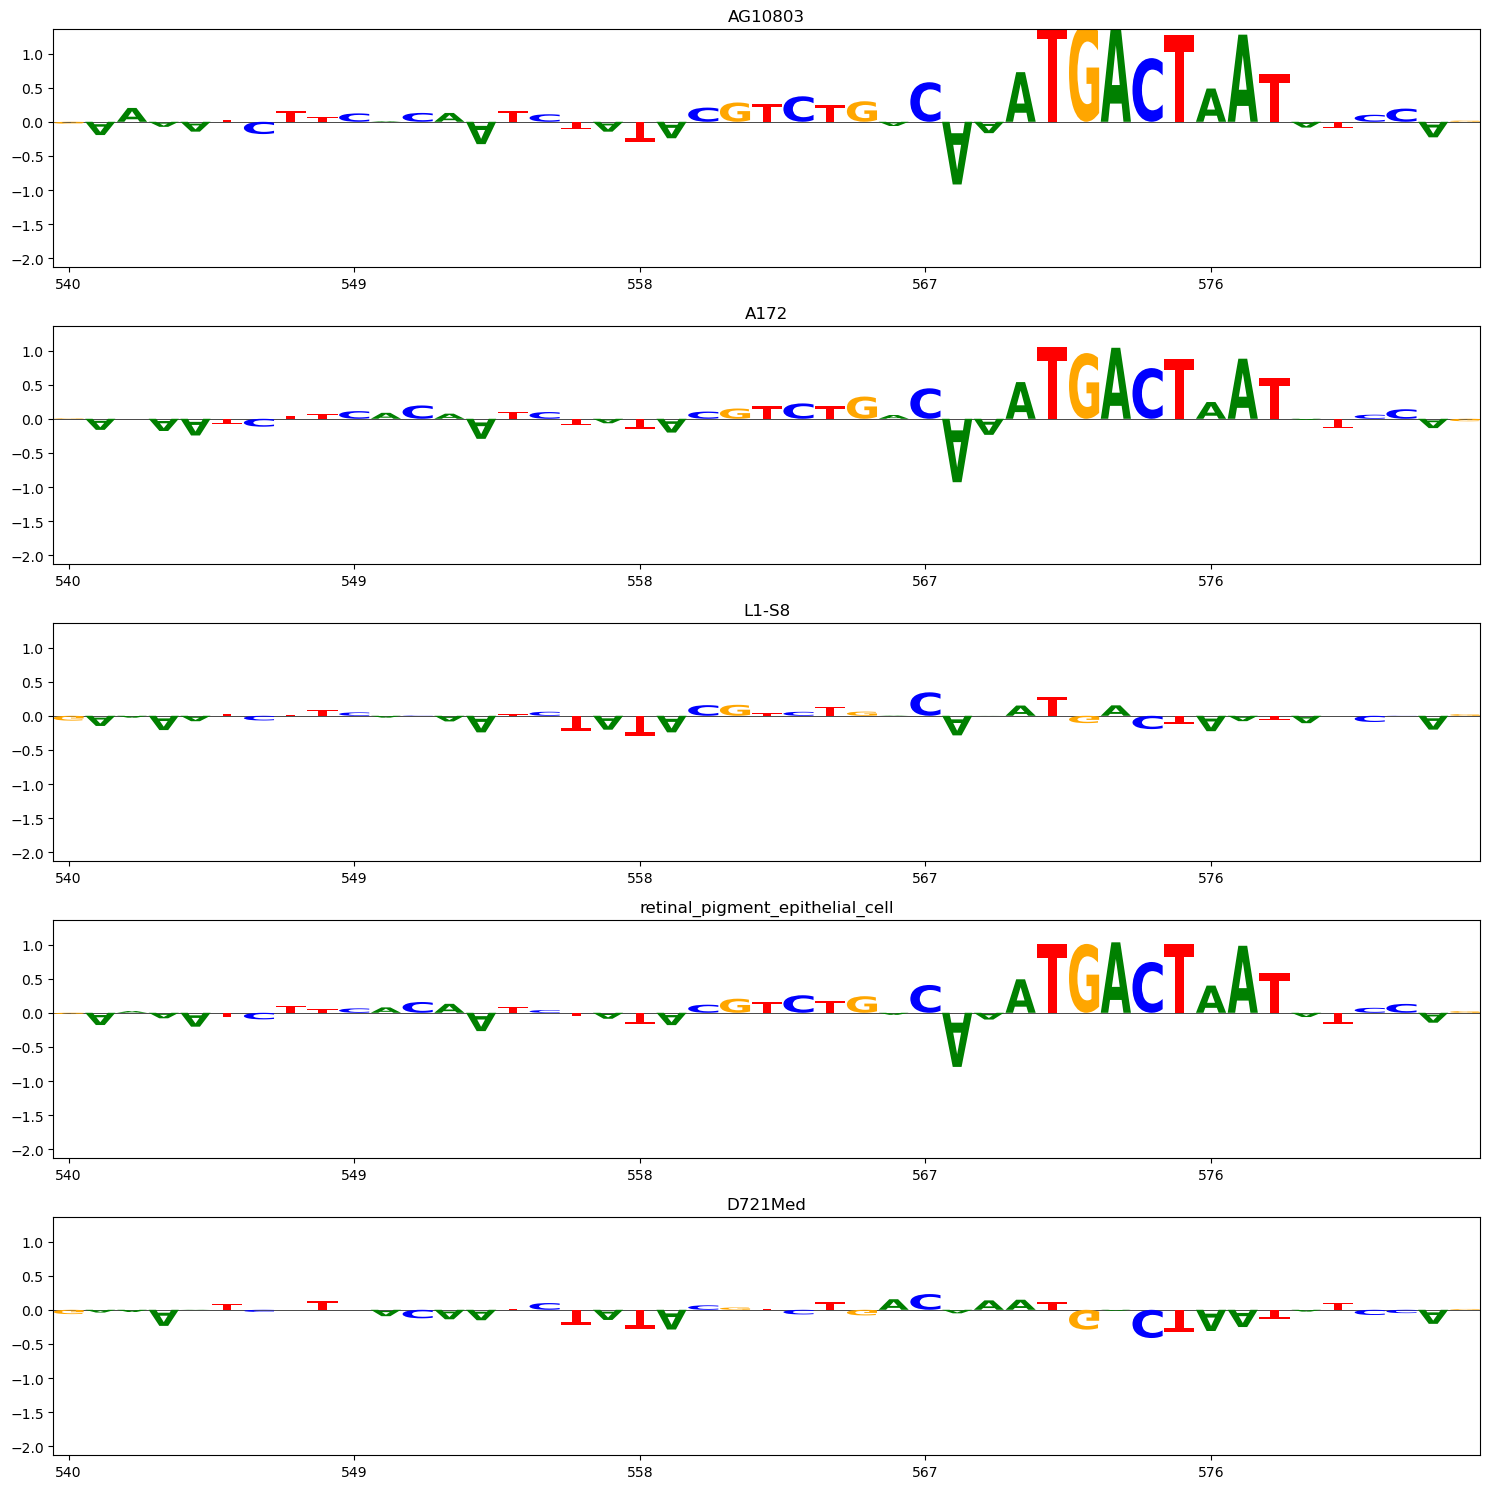

In [26]:
celltype_logo(mult,idx, idxs, mult_421939_reg.sum(0),startend=(540,585))

(<Figure size 1500x1500 with 5 Axes>,
 array([<Axes: title={'center': 'AG10803'}>,
        <Axes: title={'center': 'A172'}>,
        <Axes: title={'center': 'L1-S8'}>,
        <Axes: title={'center': 'retinal_pigment_epithelial_cell'}>,
        <Axes: title={'center': 'D721Med'}>], dtype=object))

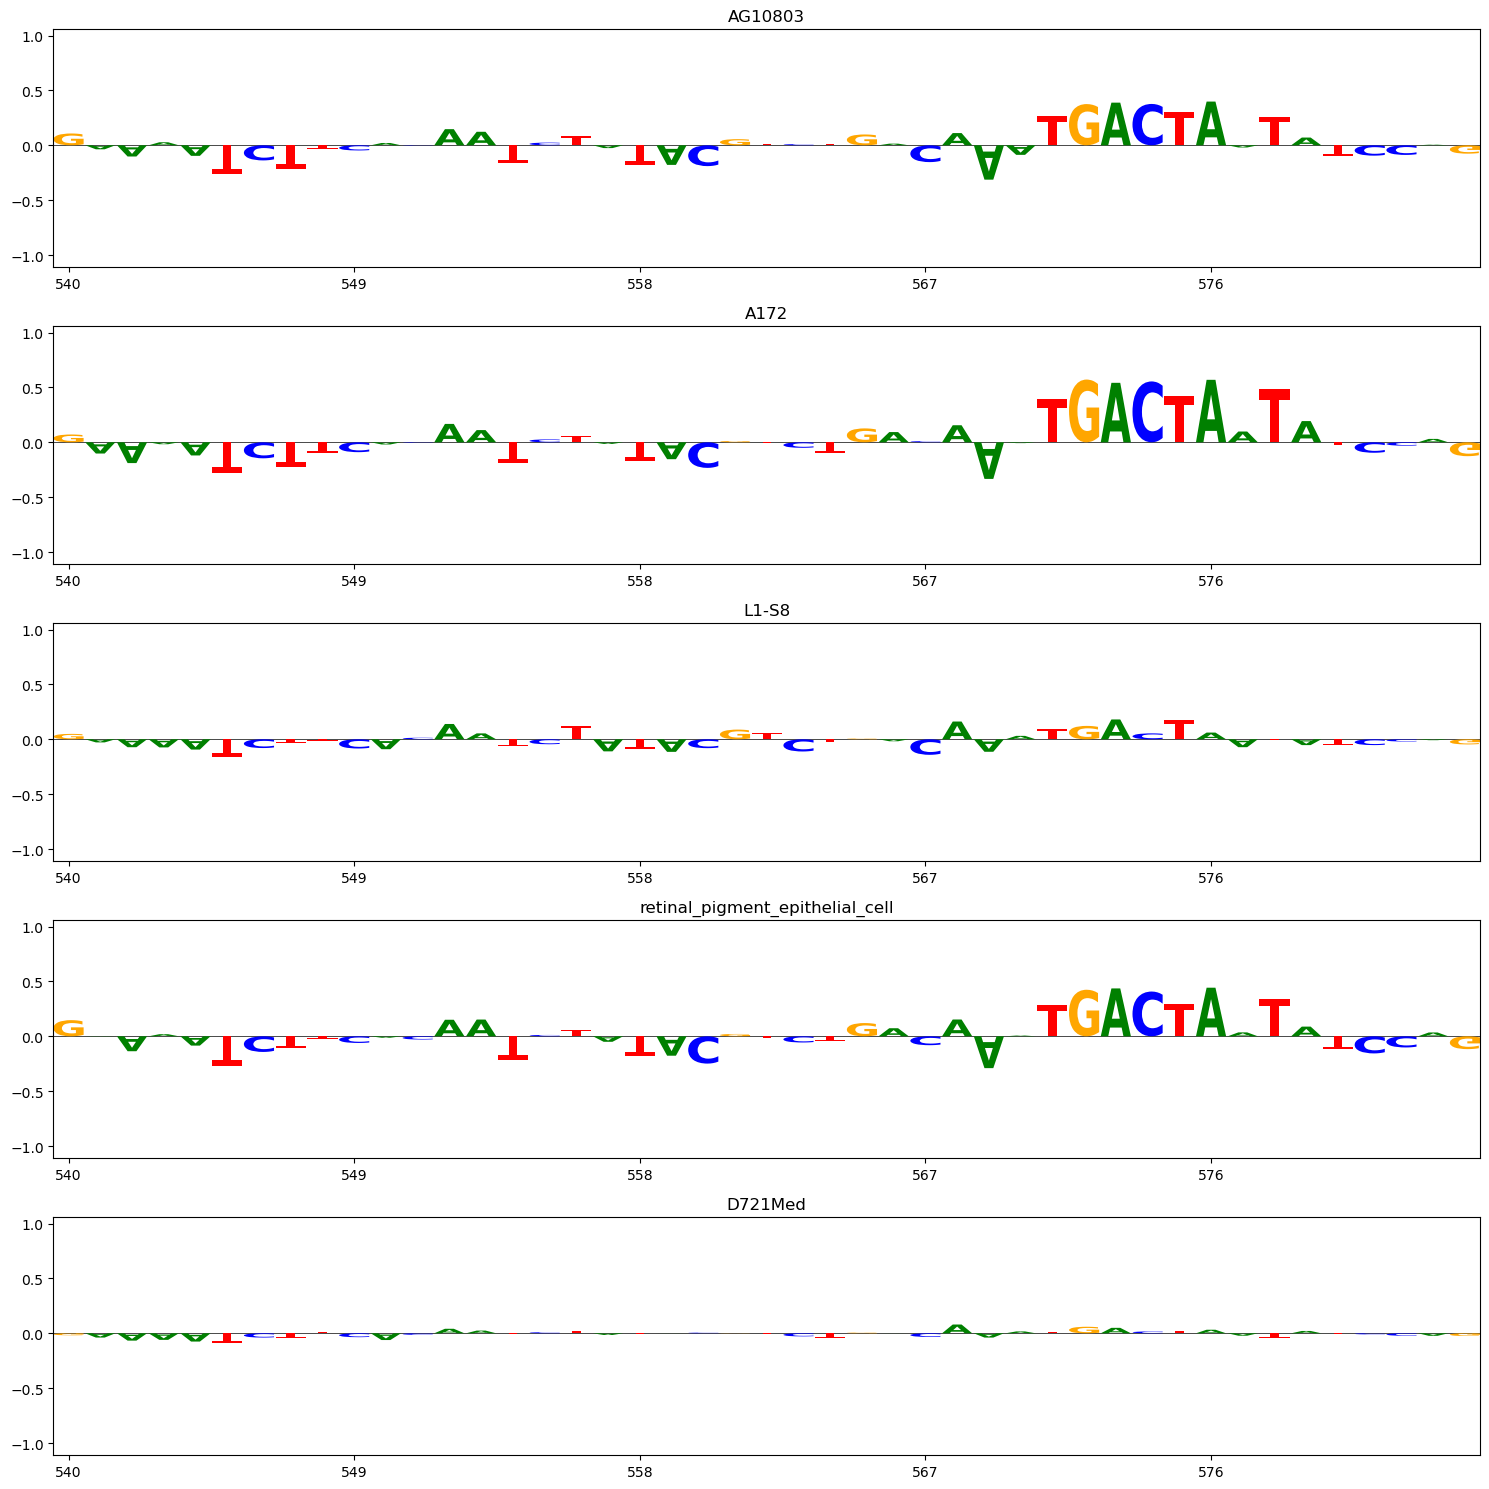

In [27]:
celltype_logo(ctst,idx, idxs, ctst_421939_reg.sum(0),startend=(540,585))

# now a different cCRE

In [29]:
idx = 174906
true_values = mult.dataset[idx][1][1] #the first 1 is results, then the second 1 is regression
ctst_174906_reg = np.load('/data/leslie/sarthak/hyena/hyena-dna/shap_analysis/most_variable_cCREs2/train/ctst_bestepoch_174906_reg.npy')
mult_174906_reg = np.load('/data/leslie/sarthak/hyena/hyena-dna/shap_analysis/most_variable_cCREs2/train/multitasking_25epoch_174906_reg.npy')
ctst_174906_class = np.load('/data/leslie/sarthak/hyena/hyena-dna/shap_analysis/most_variable_cCREs2/train/ctst_bestepoch_174906_class.npy')
mult_174906_class = np.load('/data/leslie/sarthak/hyena/hyena-dna/shap_analysis/most_variable_cCREs2/train/multitasking_25epoch_174906_class.npy')
print(ctst_174906_class.shape, ctst_174906_reg.shape, mult_174906_class.shape, mult_174906_reg.shape)

(4, 1024, 161) (4, 1024, 161) (4, 1023, 161) (4, 1023, 161)


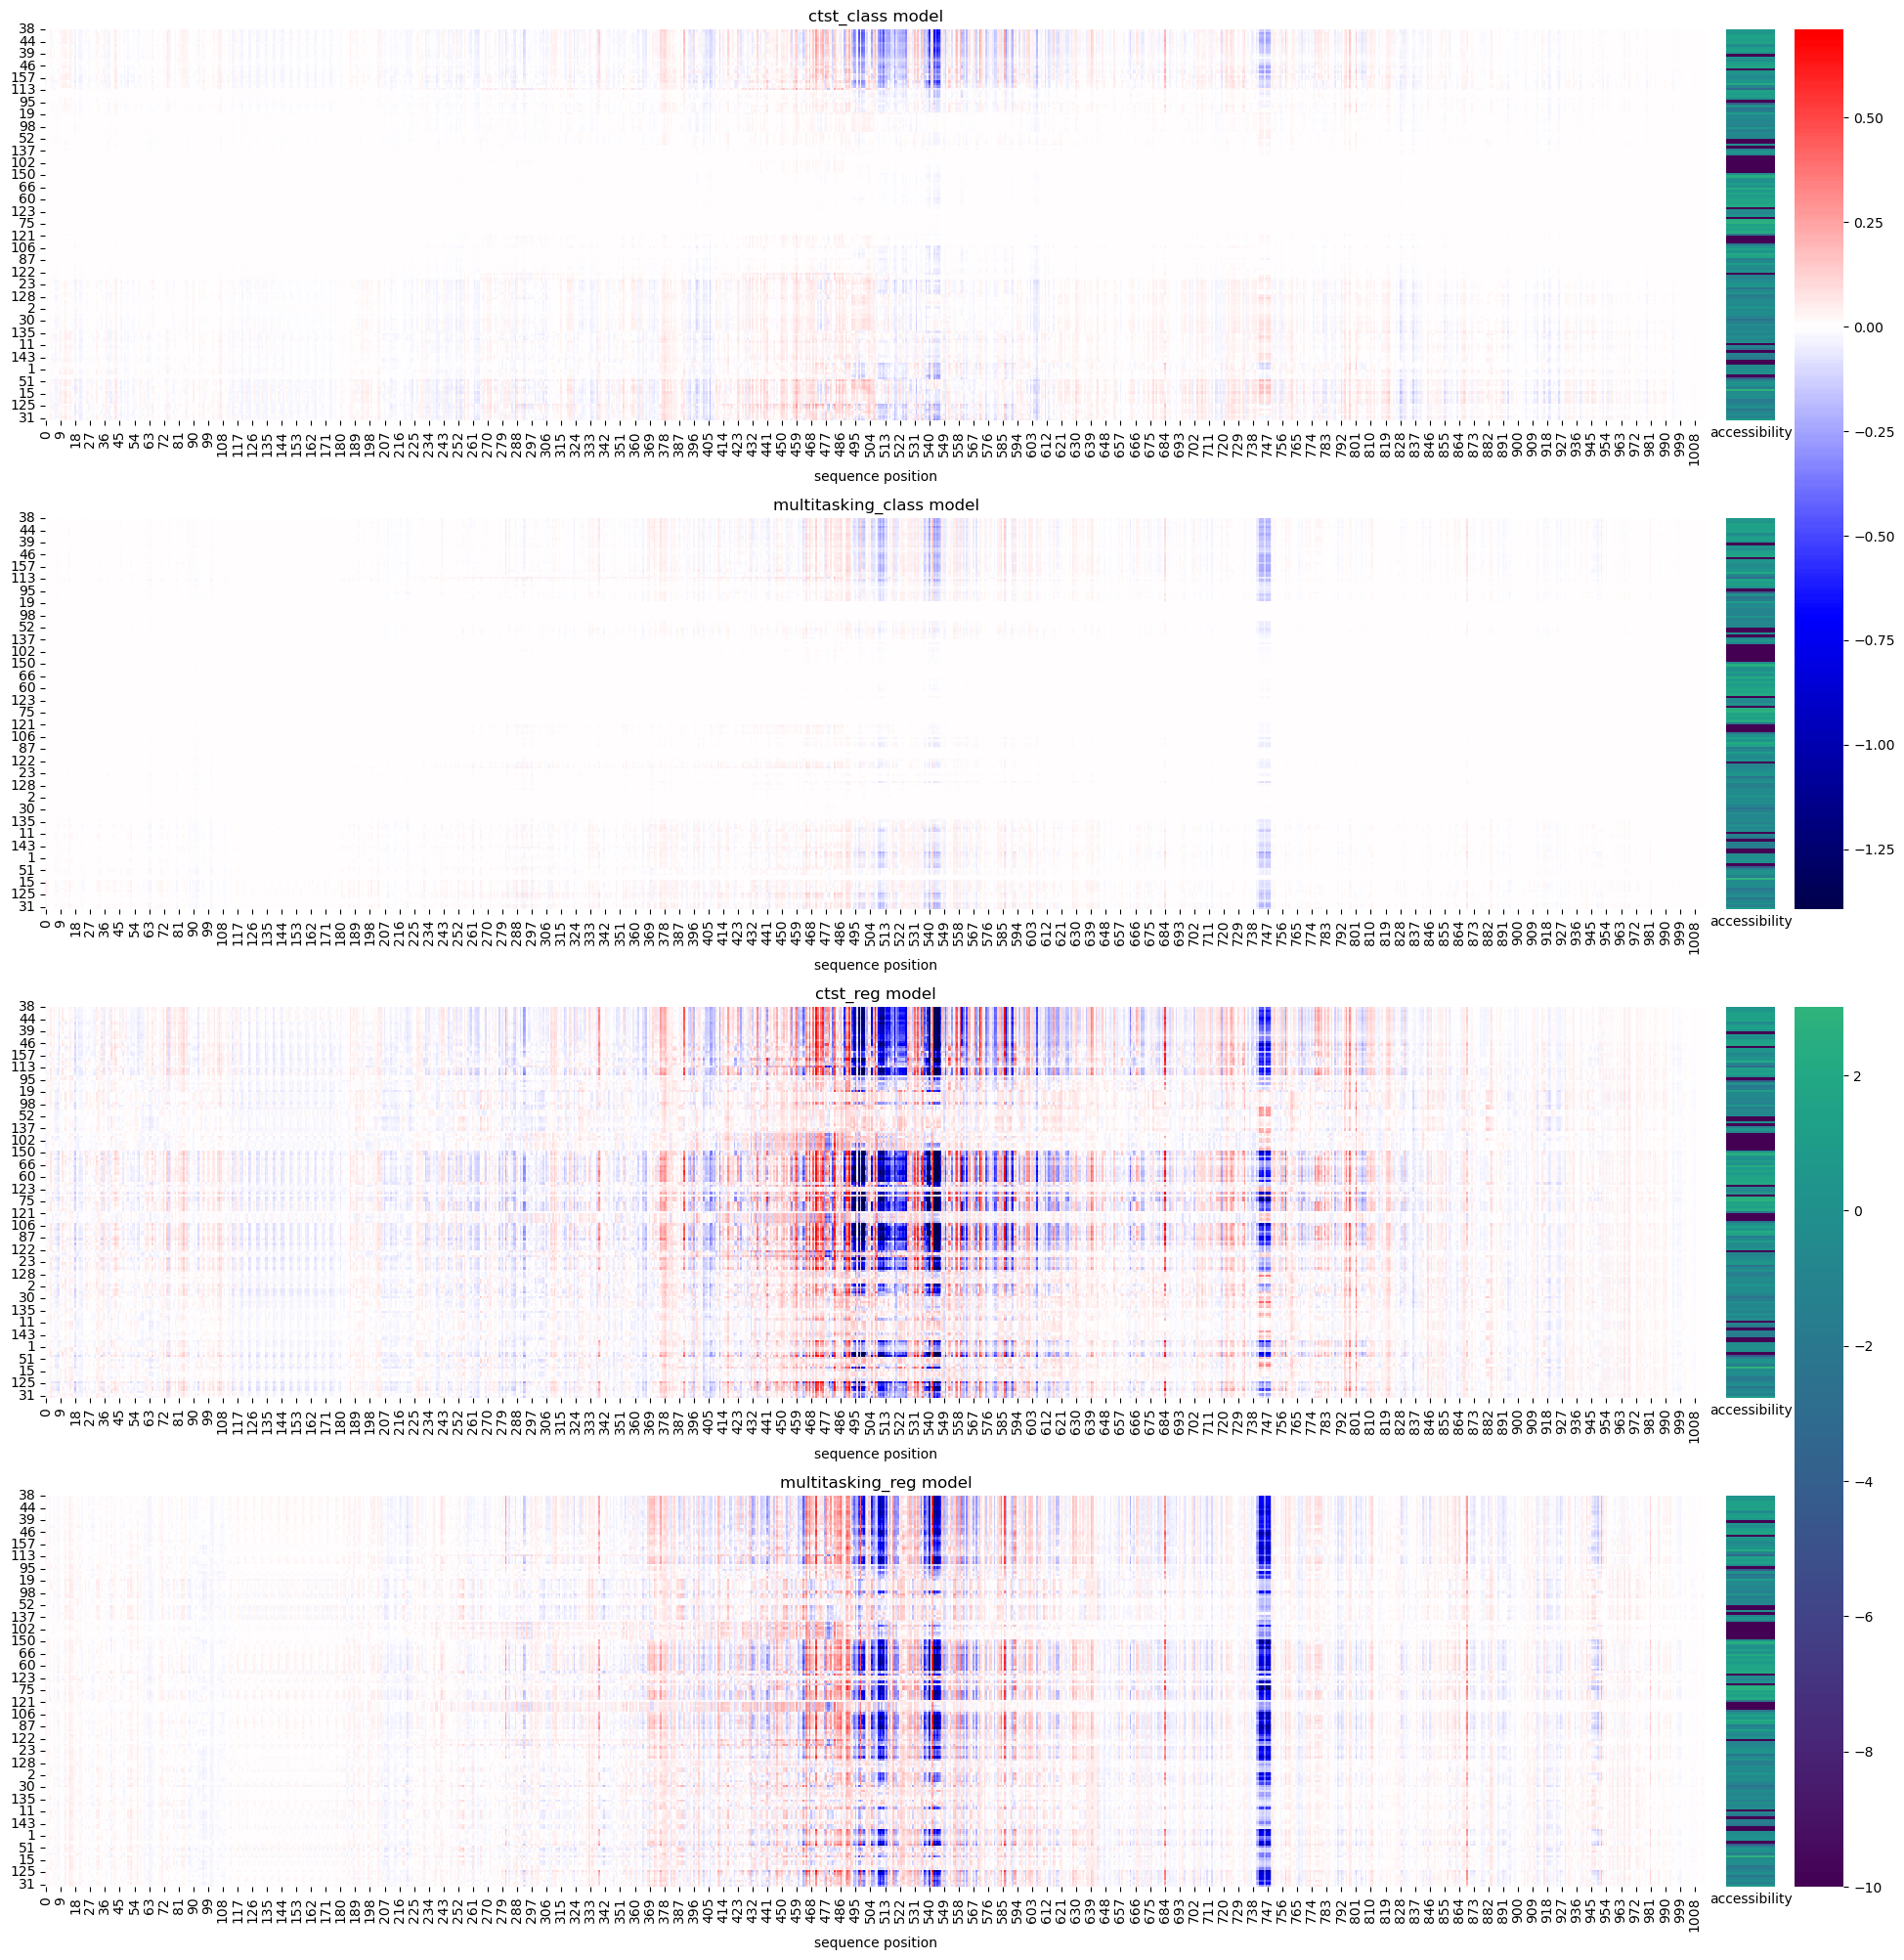

In [30]:
#now we repeat the multi cluster and then logo plots
results_list = [ctst_174906_class, mult_174906_class, ctst_174906_reg, mult_174906_reg]
multi_cluster(results_list, true_values, name_list, utils_list)

In [42]:
#let's find the indices that are negative between 738 and 756
temp = ctst_174906_reg.sum(0)[747,:]
# print(temp.shape)
print(np.where(temp<0)[0])
print(len(np.where(temp<0)[0]))
print(np.argmin(temp))
print(np.argmax(temp))

[  0   1   2   3   4   5   6   8  21  22  23  25  31  32  33  34  36  37
  38  39  40  41  42  43  44  45  46  47  49  50  57  58  59  60  61  62
  63  64  65  66  67  68  69  70  72  74  75  76  77  78  79  80  81  82
  84  85  87  88  90  91  92  93  94  96  98 100 101 106 108 112 113 116
 118 122 124 125 127 129 132 134 136 140 141 142 146 148 150 151 152 157
 158 160]
92
94
159


(<Figure size 1500x1800 with 6 Axes>,
 array([<Axes: title={'center': 'AG04449'}>,
        <Axes: title={'center': 'epidermal_melanocyte'}>,
        <Axes: title={'center': 'T-helper_17_cell'}>,
        <Axes: title={'center': 'GM20000'}>,
        <Axes: title={'center': 'bronchial_epithelial_cell'}>,
        <Axes: title={'center': 'SK-N-DZ'}>], dtype=object))

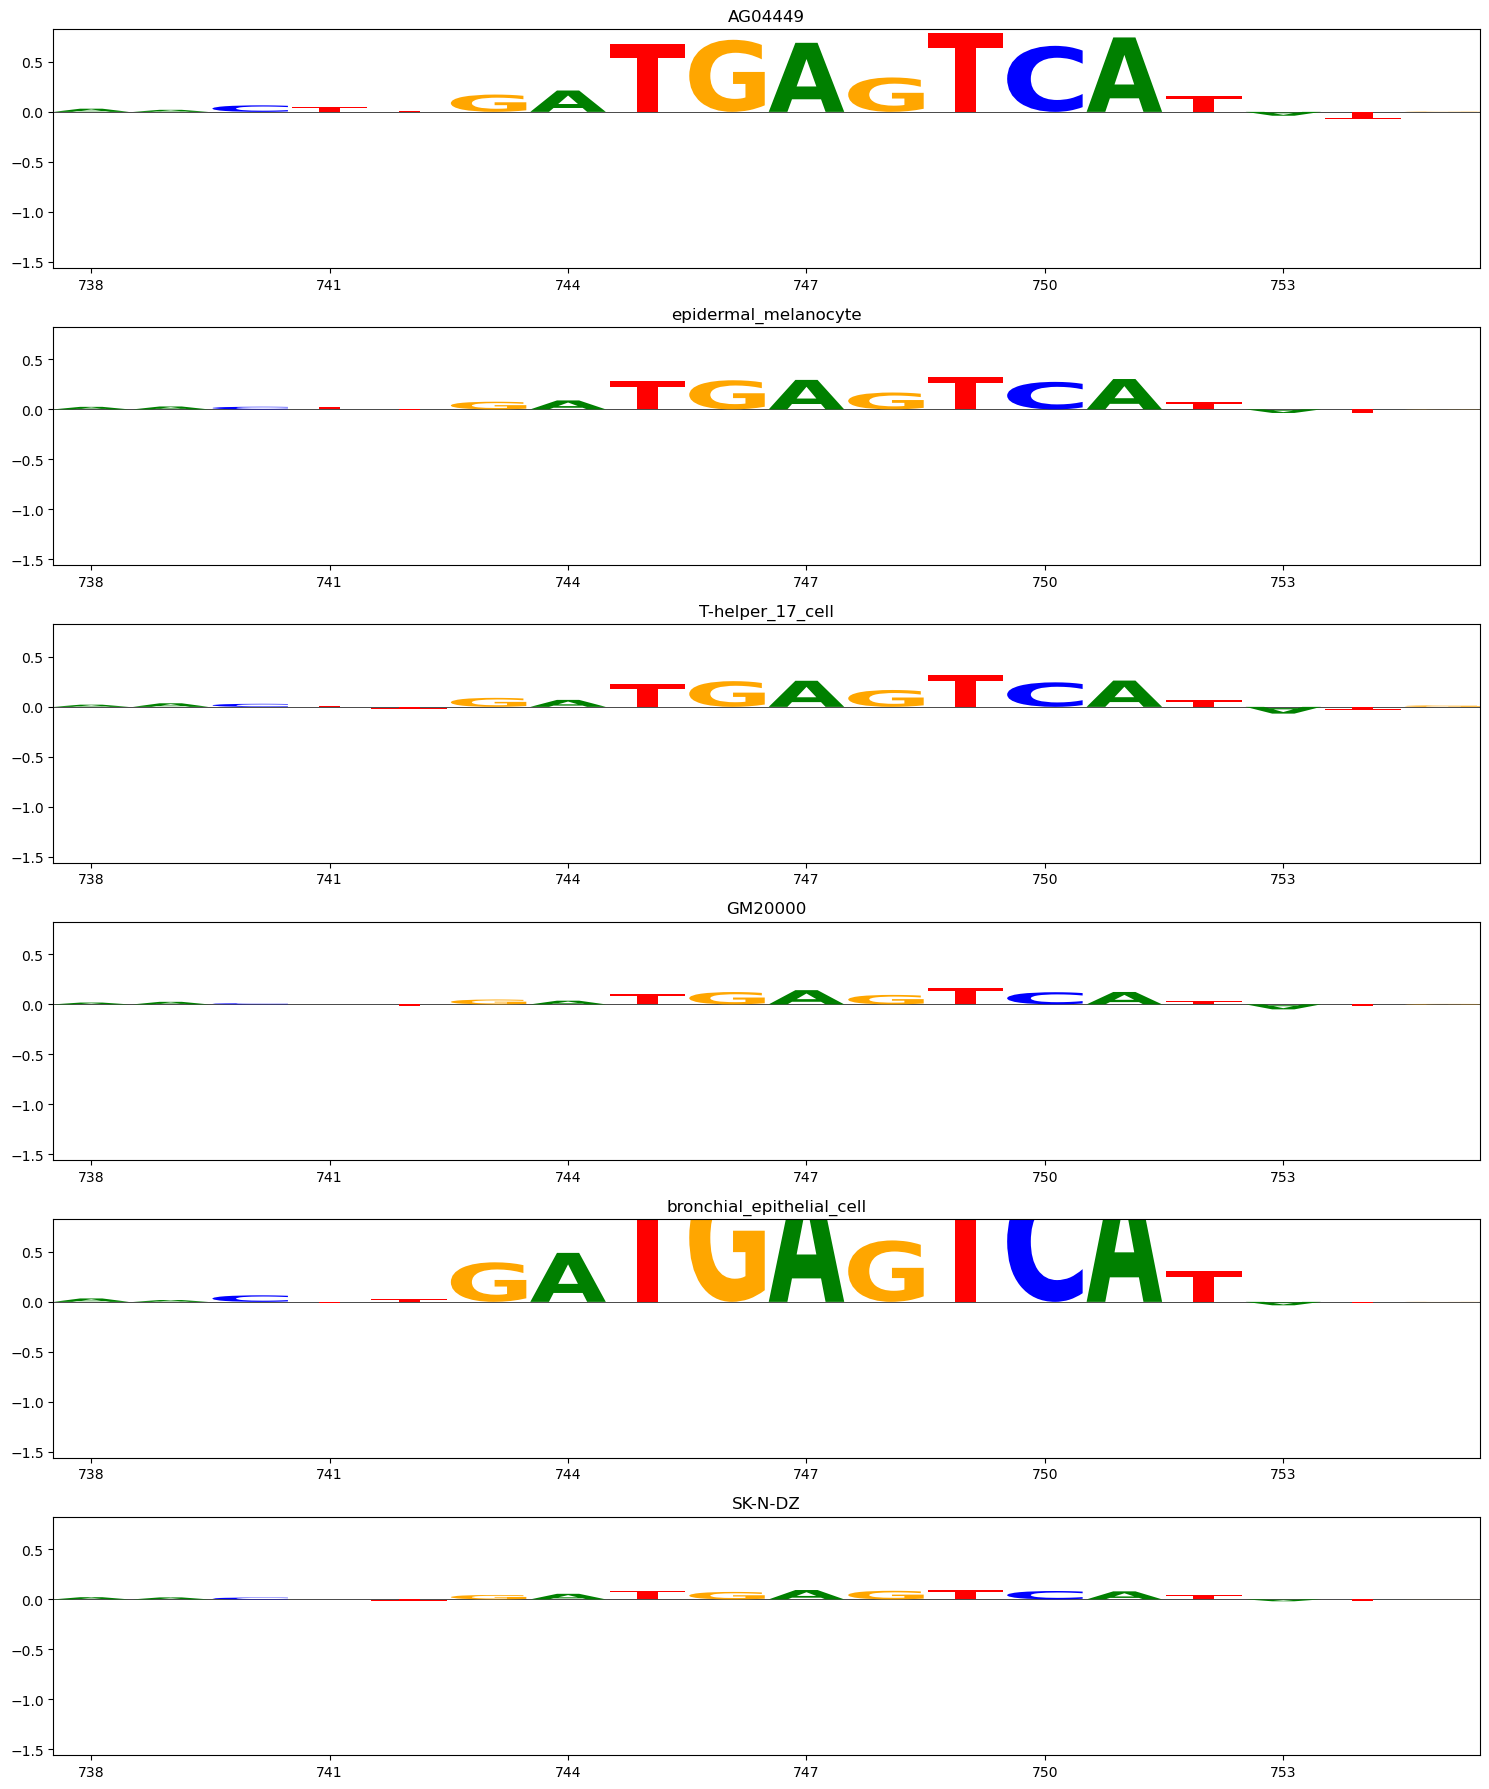

In [43]:
#look at 738 to 756
idxs = [38, 31, 98, 19, 94, 159]
celltype_logo(mult,idx, idxs, mult_174906_reg.sum(0),startend=(738,756))

(<Figure size 1500x1800 with 6 Axes>,
 array([<Axes: title={'center': 'AG04449'}>,
        <Axes: title={'center': 'epidermal_melanocyte'}>,
        <Axes: title={'center': 'T-helper_17_cell'}>,
        <Axes: title={'center': 'GM20000'}>,
        <Axes: title={'center': 'bronchial_epithelial_cell'}>,
        <Axes: title={'center': 'SK-N-DZ'}>], dtype=object))

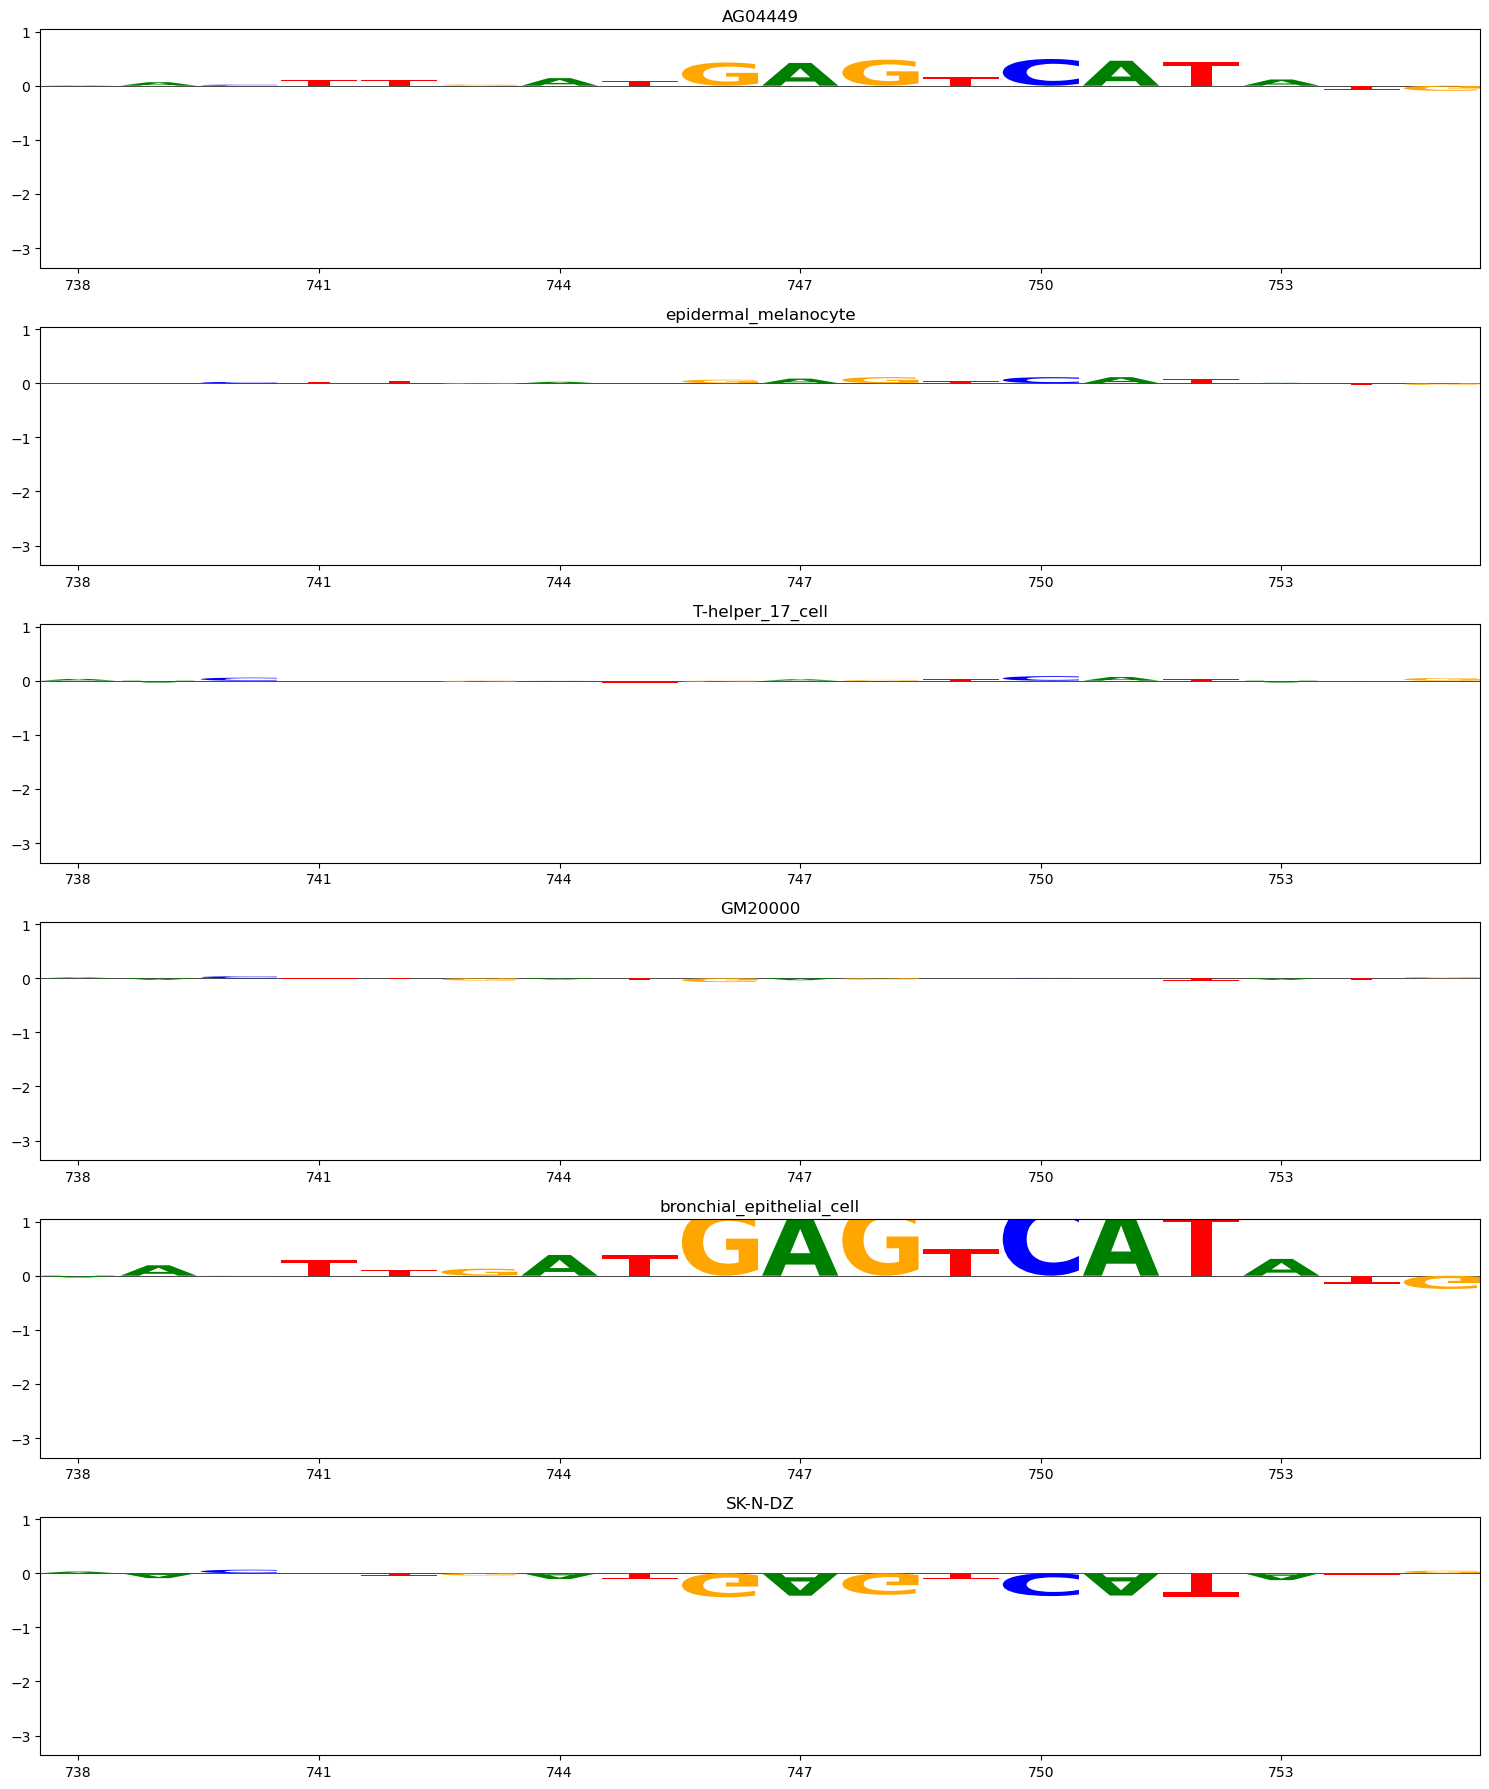

In [44]:
celltype_logo(ctst,idx, idxs, ctst_174906_reg.sum(0),startend=(738,756))

(<Figure size 1500x1800 with 6 Axes>,
 array([<Axes: title={'center': 'AG04449'}>,
        <Axes: title={'center': 'epidermal_melanocyte'}>,
        <Axes: title={'center': 'T-helper_17_cell'}>,
        <Axes: title={'center': 'GM20000'}>,
        <Axes: title={'center': 'bronchial_epithelial_cell'}>,
        <Axes: title={'center': 'SK-N-DZ'}>], dtype=object))

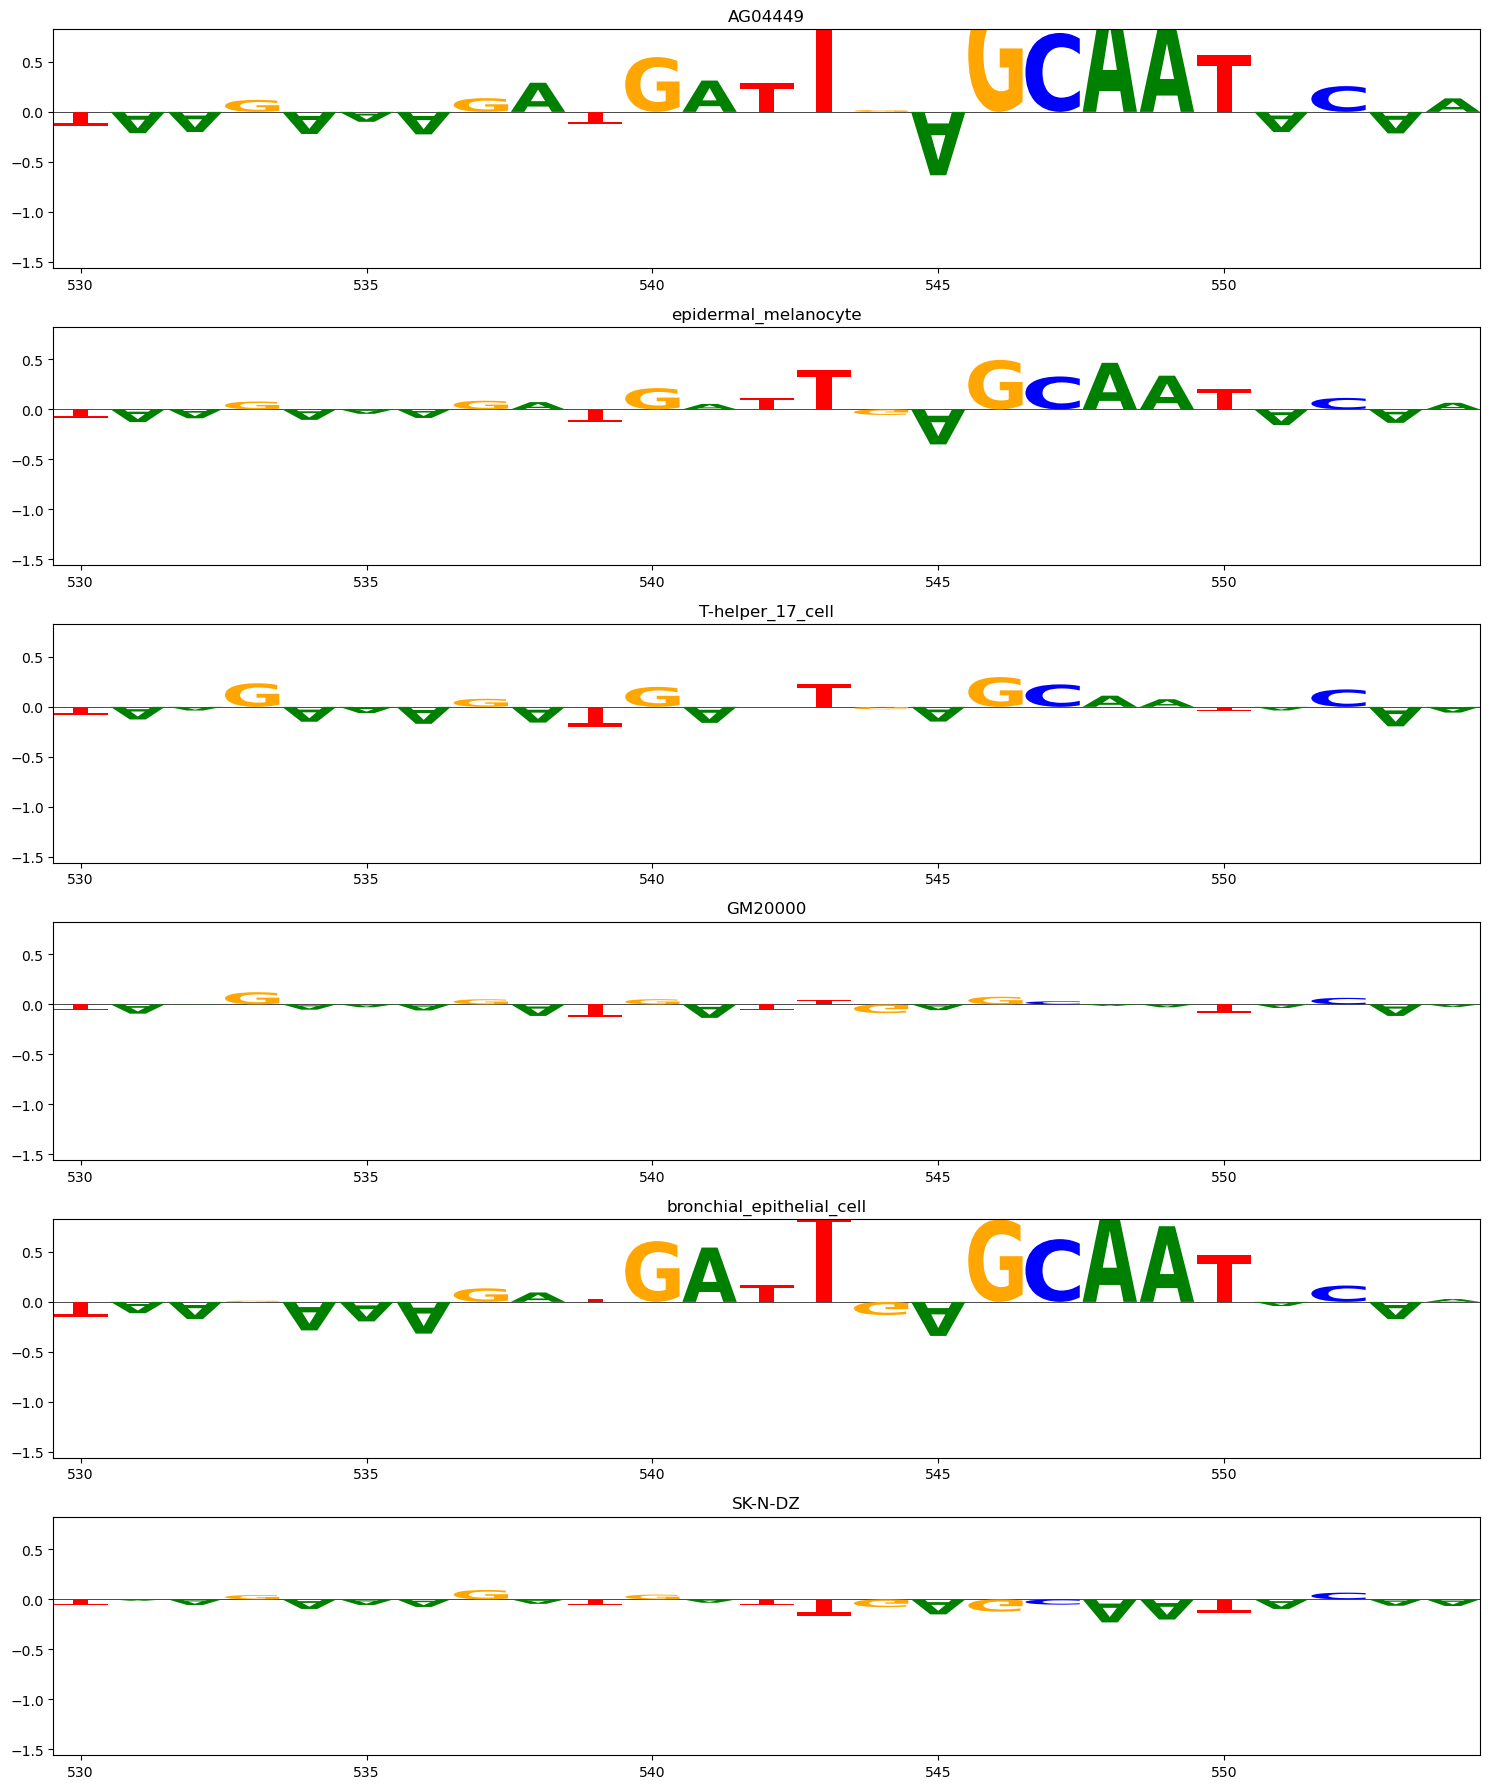

In [47]:
#and 530 to 550
celltype_logo(mult,idx, idxs, mult_174906_reg.sum(0),startend=(530,555))

(<Figure size 1500x1800 with 6 Axes>,
 array([<Axes: title={'center': 'AG04449'}>,
        <Axes: title={'center': 'epidermal_melanocyte'}>,
        <Axes: title={'center': 'T-helper_17_cell'}>,
        <Axes: title={'center': 'GM20000'}>,
        <Axes: title={'center': 'bronchial_epithelial_cell'}>,
        <Axes: title={'center': 'SK-N-DZ'}>], dtype=object))

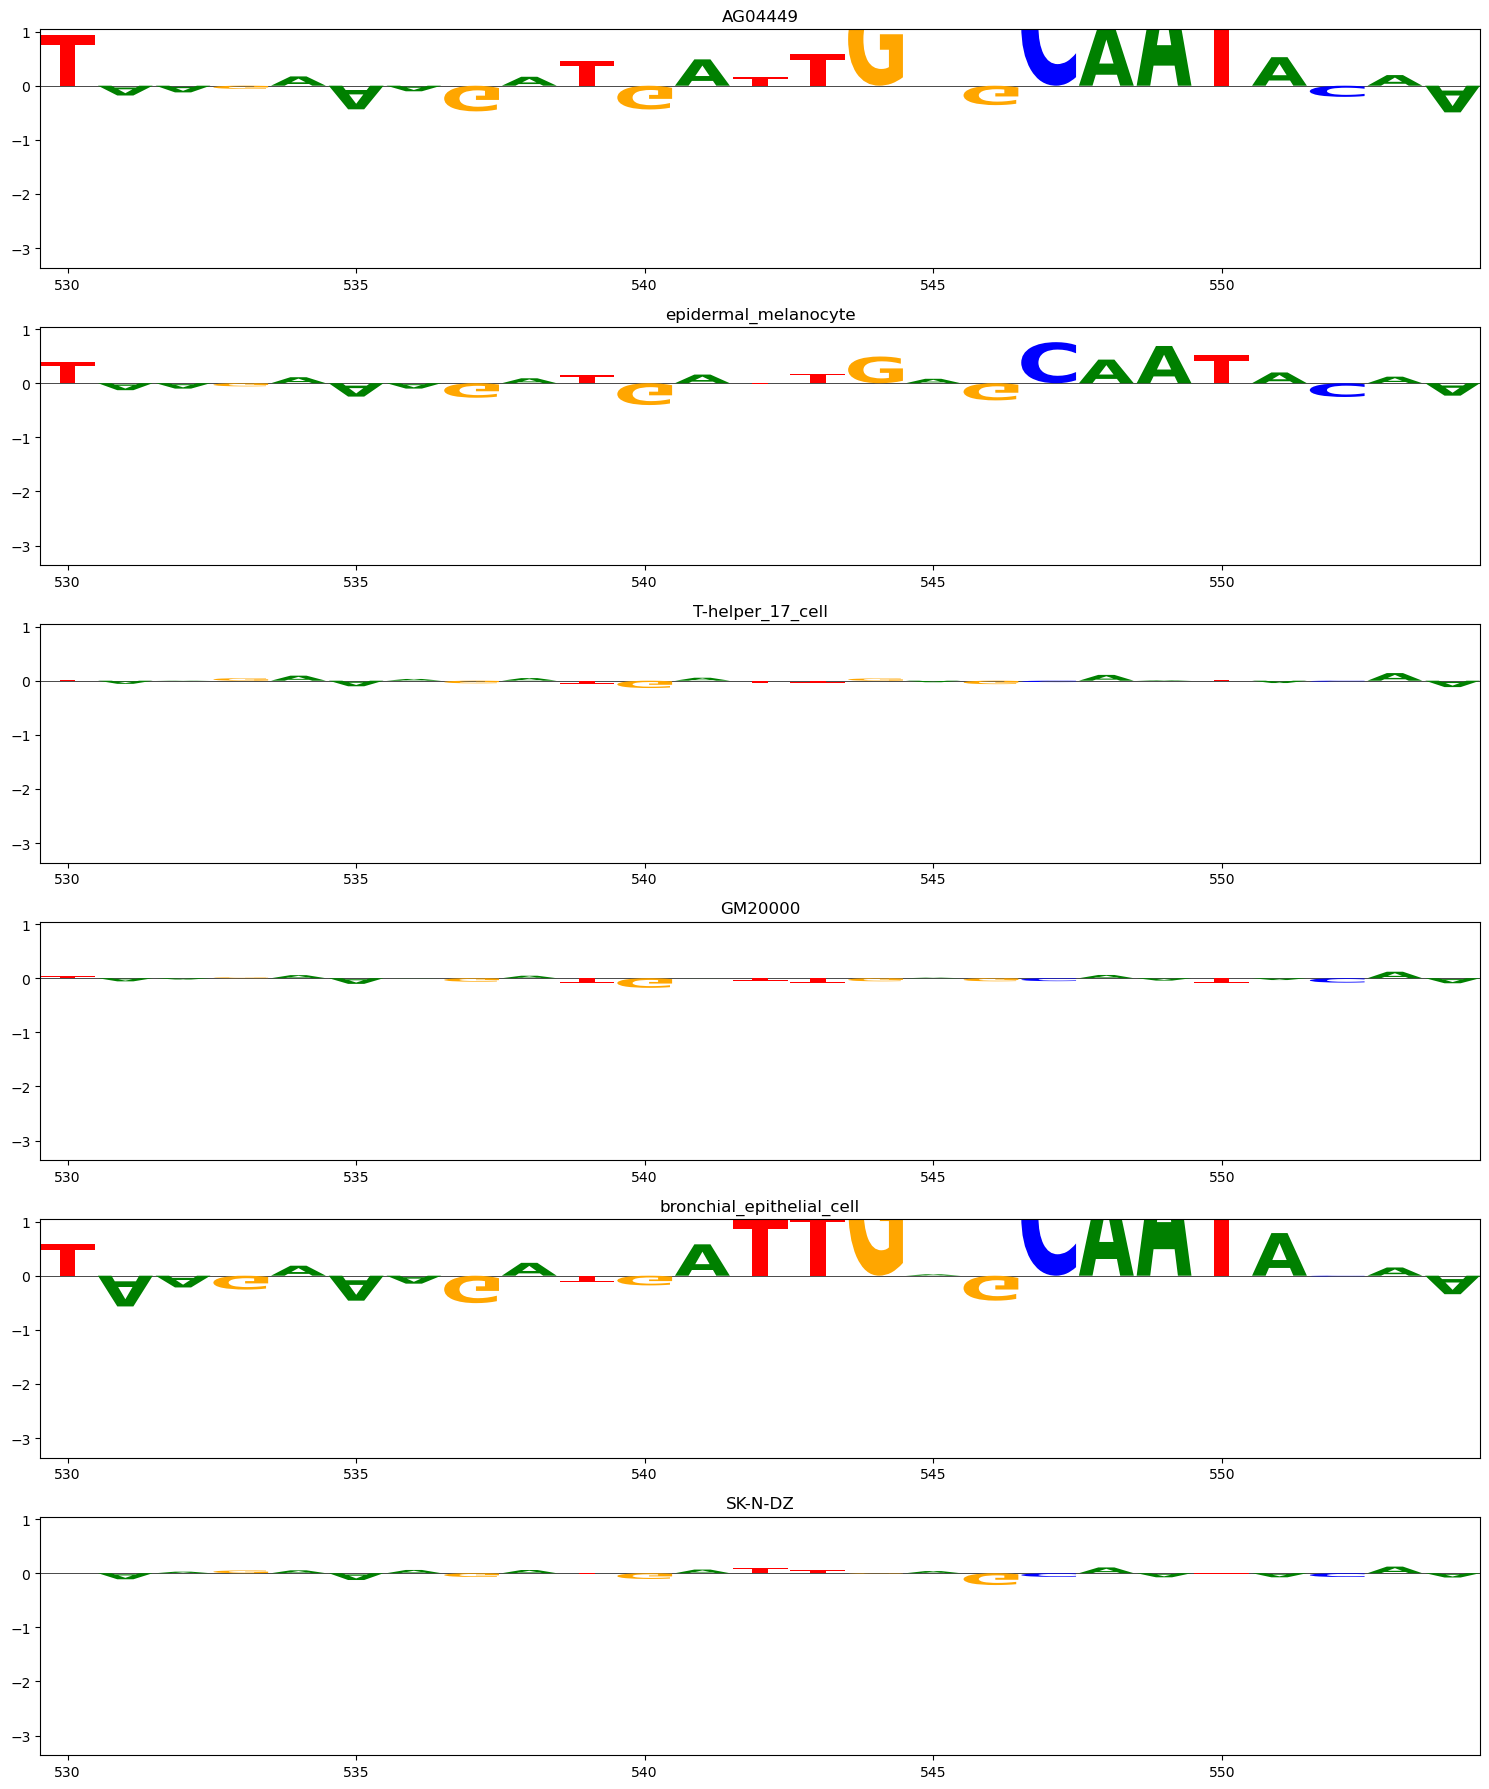

In [49]:
celltype_logo(ctst,idx, idxs, ctst_174906_reg.sum(0),startend=(530,555))

(<Figure size 1500x2100 with 14 Axes>,
 array([[<Axes: title={'center': 'AG04449, true=0.5926023721694946'}>,
         <Axes: title={'center': 'AG04449, true=0.5926023721694946'}>],
        [<Axes: title={'center': 'epidermal_melanocyte, true=1.016352653503418'}>,
         <Axes: title={'center': 'epidermal_melanocyte, true=1.016352653503418'}>],
        [<Axes: title={'center': 'T-helper_17_cell, true=0.5026026964187622'}>,
         <Axes: title={'center': 'T-helper_17_cell, true=0.5026026964187622'}>],
        [<Axes: title={'center': 'GM20000, true=-0.6469516158103943'}>,
         <Axes: title={'center': 'GM20000, true=-0.6469516158103943'}>],
        [<Axes: title={'center': 'bronchial_epithelial_cell, true=2.76699161529541'}>,
         <Axes: title={'center': 'bronchial_epithelial_cell, true=2.76699161529541'}>],
        [<Axes: title={'center': 'SK-N-DZ, true=-0.2702121138572693'}>,
         <Axes: title={'center': 'SK-N-DZ, true=-0.2702121138572693'}>],
        [<Axes: title={'c

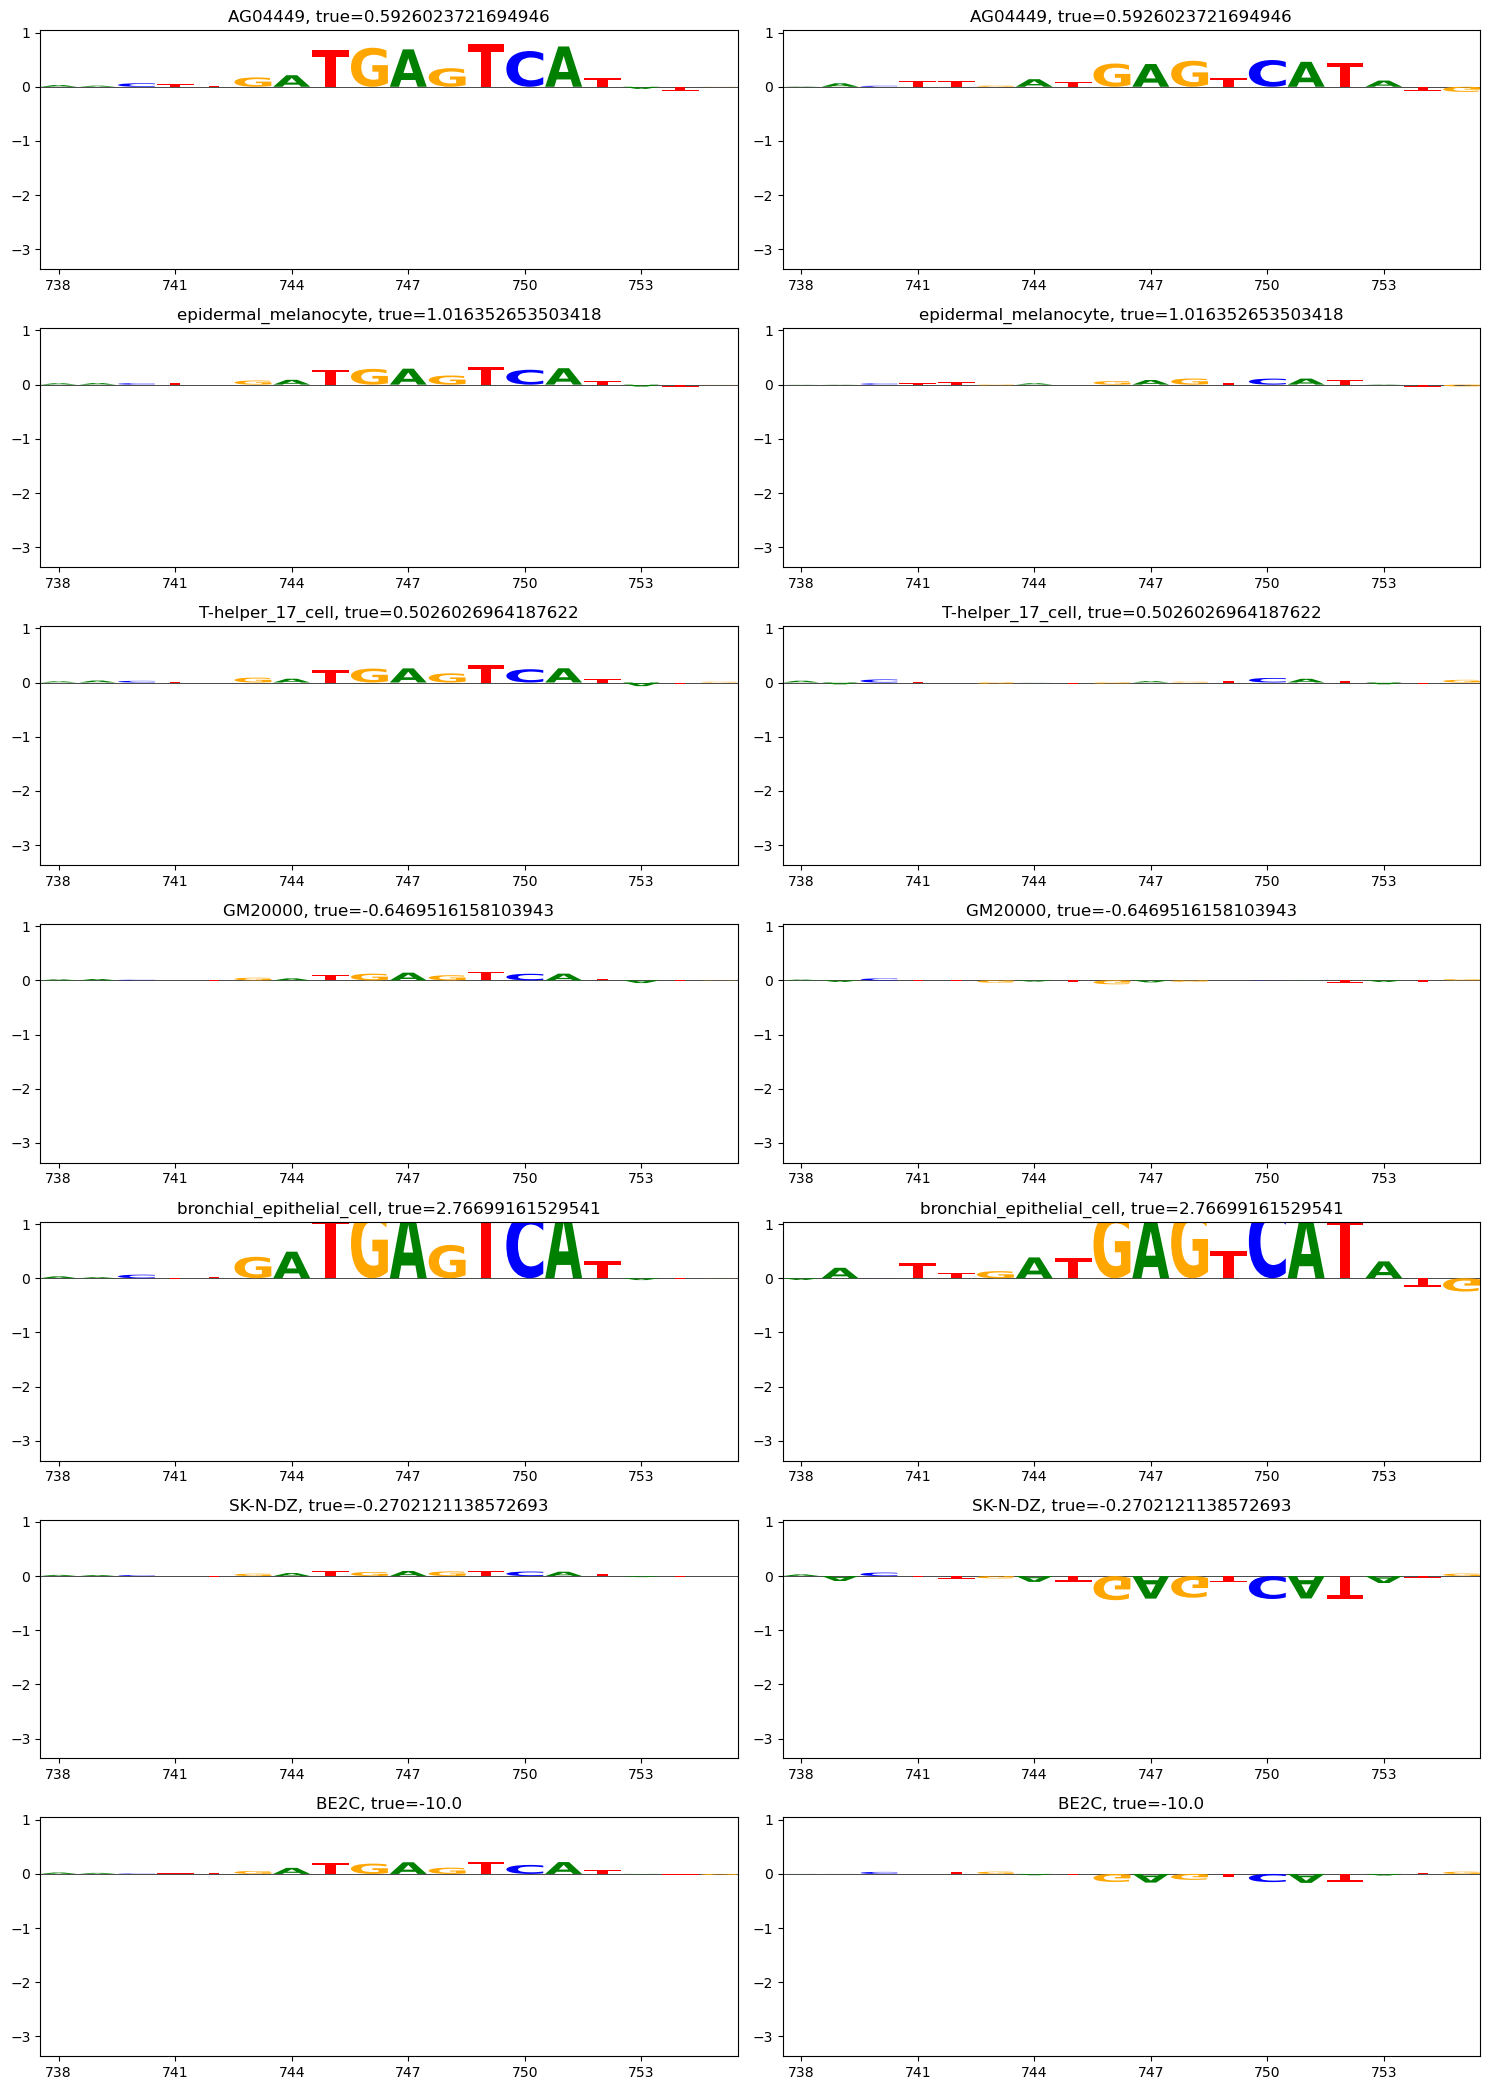

In [62]:
#new function to compare them
def celltype_compare_logo(utils_list, ccre, celltype_idx, heights_all_list, startend=None, true_values = None):
    # utils is the list of utilities in order multitasking, ctst
    # ccre is the ccre number of that split
    # startend is the start and end of the sequence, if none, will use the middle 100. Note that it adjusts DNase and DNase_ctst slightly, it aligns to the multitasking model!
    # heights_all is basically just the saved array of ISM values or can be something else
    fig, ax = plt.subplots(len(celltype_idx),2, figsize = (15,len(celltype_idx)*3))
    celltypesfile = '/data/leslie/sarthak/data/cCRE_celltype_matrices/cell_types_filtered.txt'
    # if true_values is None:
    #     utils.dataset[ccre][1]
    #now load in the celltypes
    celltypes = []
    with open(celltypesfile) as f:
        for line in f:
            celltypes.append(line.strip())
    #first find global min and max
    heights_all = np.concatenate(heights_all_list, axis=0)
    global_min = max(i.max() for i in heights_all_list) #because positive and negative get flipped!!
    global_max = min(i.min() for i in heights_all_list)
    # print(global_min, global_max)
    for util_counter,utils in enumerate(utils_list):
        heights_all = heights_all_list[util_counter]
        for j,i in enumerate(celltype_idx):
            #what we do is first get the sequence
            if utils.mtype == 'DNase' or utils.mtype == 'DNase_ctst':
                tempccre = 161*ccre
            else:
                tempccre = ccre
            a,_ = utils.dataset[tempccre]
            #now we will check to see if it's none, if so we will use the middle
            if startend is None:
                start = utils.middle-50
                end = utils.middle+50
            else:
                start = startend[0]
                end = startend[1]

            if utils.mtype == 'DNase':
                start = start+4
                end = end+4
            try:
                seq=utils.dataset.tokenizer.decode(a)
            except:
                seq=utils.dataset.tokenizer.decode(a[1:])
            cut_seq = seq[start:end]
            #in this function heights is required, generally just the results used for ism

            #now we define cut heights
            heights = heights_all[start:end,i] #will be a matrix of values, we take just the row of the provided celltype_idx
            heights = -heights
            logo_df = pd.DataFrame(0, index=np.arange(len(cut_seq)), columns=list(set(cut_seq)), dtype=float)
            # print(heights)

            # Fill the DataFrame with heights, converting heights to float if necessary
            
            for k, symbol in enumerate(cut_seq):
                logo_df.loc[k, symbol] = heights[k]

            # Generate the sequence logo
            logo = logomaker.Logo(logo_df, color_scheme='classic', flip_below = True, ax = ax[j, util_counter])
            #now set the title
            try:
                ax[j,util_counter].set_title(f'{celltypes[i]}, true={true_values[i]}') #if you provide true values then it works
            except:
                ax[j,util_counter].set_title(f'{celltypes[i]}')
            ax[j,util_counter].set_xticks(np.arange(0,end-start,int((end-start)/5)))
            ax[j,util_counter].set_xticklabels(np.arange(start,end,int((end-start)/5)))
            ax[j,util_counter].set_ylim(global_max,global_min)
    plt.tight_layout()
    return fig, ax
utils_list = [mult,ctst]
idxs = [38, 31, 98, 19, 94, 159, 102]
celltype_compare_logo(utils_list,idx, idxs, [mult_174906_reg.sum(0), ctst_174906_reg.sum(0)], startend=(738,756), true_values = true_values)

In [66]:
#let's look at another one
idx = 109218
ctst_reg = np.load(f'/data/leslie/sarthak/hyena/hyena-dna/shap_analysis/most_variable_cCREs2/train/ctst_bestepoch_{idx}_reg.npy')
mult_reg = np.load(f'/data/leslie/sarthak/hyena/hyena-dna/shap_analysis/most_variable_cCREs2/train/multitasking_25epoch_{idx}_reg.npy')
ctst_class = np.load(f'/data/leslie/sarthak/hyena/hyena-dna/shap_analysis/most_variable_cCREs2/train/ctst_bestepoch_{idx}_class.npy')
mult_class = np.load(f'/data/leslie/sarthak/hyena/hyena-dna/shap_analysis/most_variable_cCREs2/train/multitasking_25epoch_{idx}_class.npy')

print(ctst_class.shape, ctst_reg.shape, mult_class.shape, mult_reg.shape)

(4, 1024, 161) (4, 1024, 161) (4, 1023, 161) (4, 1023, 161)


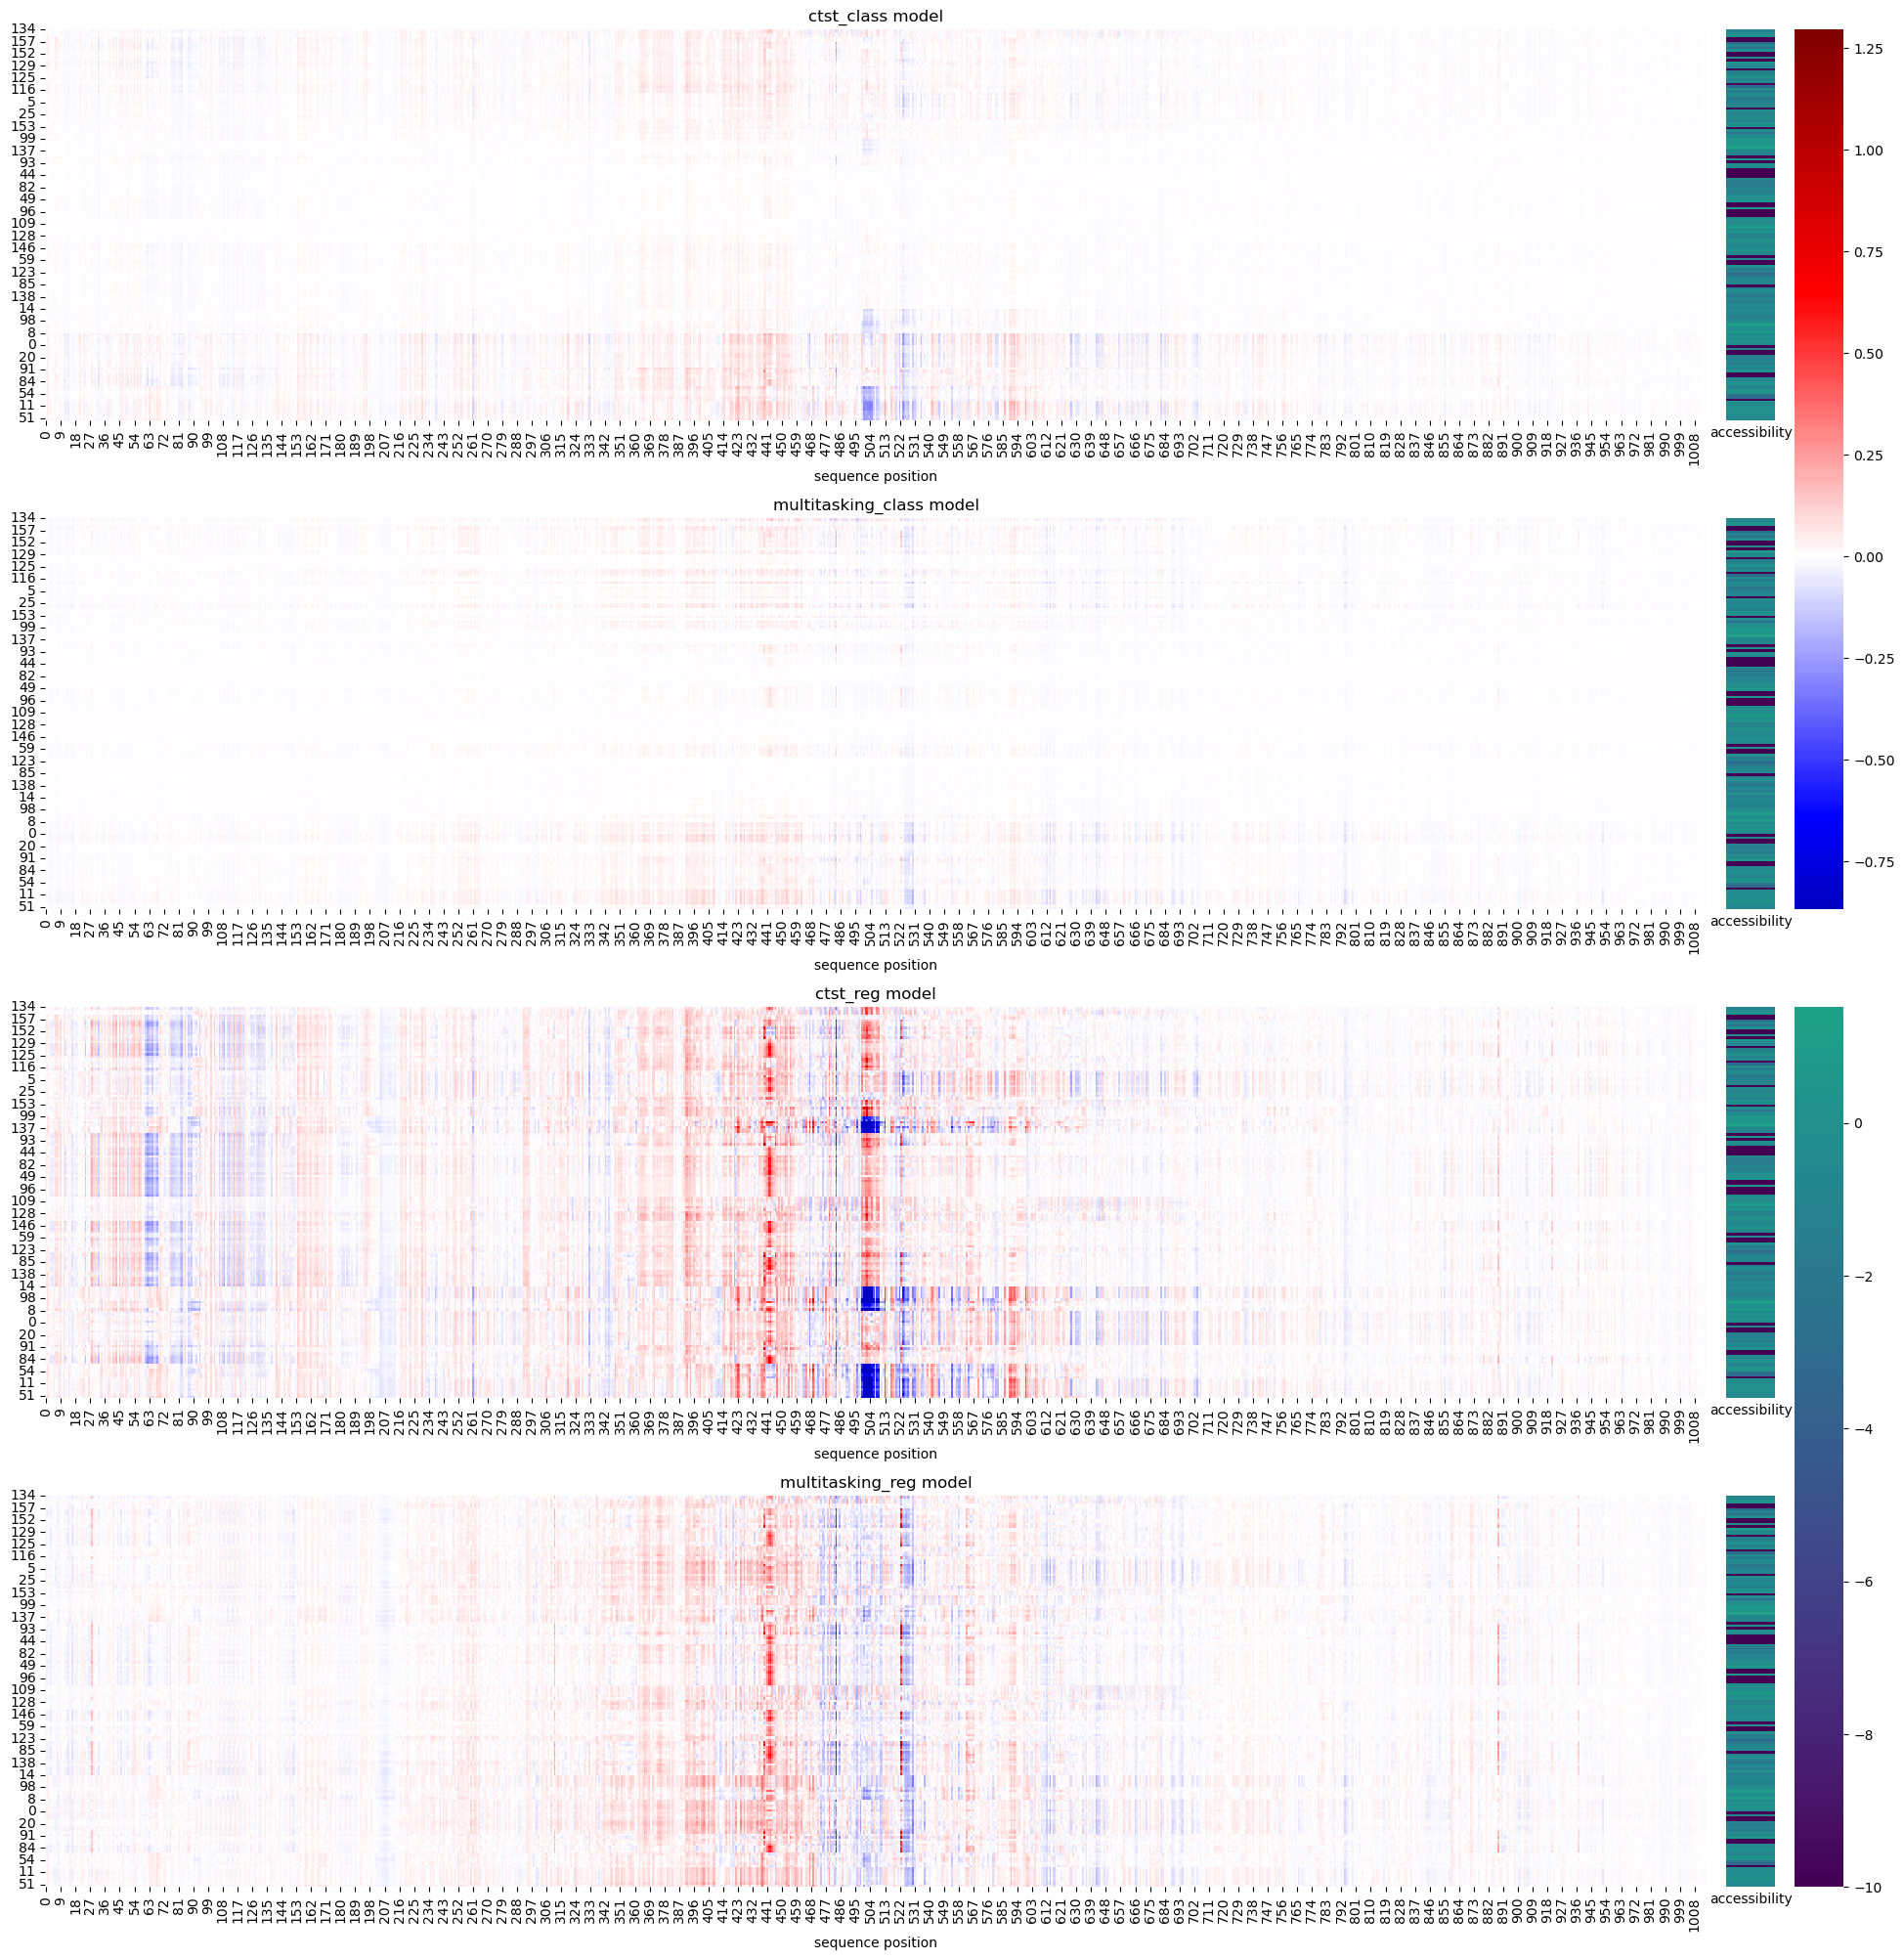

In [67]:
true_values = mult.dataset[idx][1][1] #the first 1 is results, then the second 1 is regression
results_list = [ctst_class, mult_class, ctst_reg, mult_reg]
utils_list = [ctst, mult, ctst, mult]
multi_cluster(results_list, true_values, name_list, utils_list)

(<Figure size 1500x2100 with 14 Axes>,
 array([[<Axes: title={'center': 'AG04449, true=-10.0'}>,
         <Axes: title={'center': 'AG04449, true=-10.0'}>],
        [<Axes: title={'center': 'epidermal_melanocyte, true=-0.02827451191842556'}>,
         <Axes: title={'center': 'epidermal_melanocyte, true=-0.02827451191842556'}>],
        [<Axes: title={'center': 'T-helper_17_cell, true=-0.037331752479076385'}>,
         <Axes: title={'center': 'T-helper_17_cell, true=-0.037331752479076385'}>],
        [<Axes: title={'center': 'GM20000, true=-0.6070318818092346'}>,
         <Axes: title={'center': 'GM20000, true=-0.6070318818092346'}>],
        [<Axes: title={'center': 'bronchial_epithelial_cell, true=-0.6680873036384583'}>,
         <Axes: title={'center': 'bronchial_epithelial_cell, true=-0.6680873036384583'}>],
        [<Axes: title={'center': 'SK-N-DZ, true=-1.381049633026123'}>,
         <Axes: title={'center': 'SK-N-DZ, true=-1.381049633026123'}>],
        [<Axes: title={'center': 'B

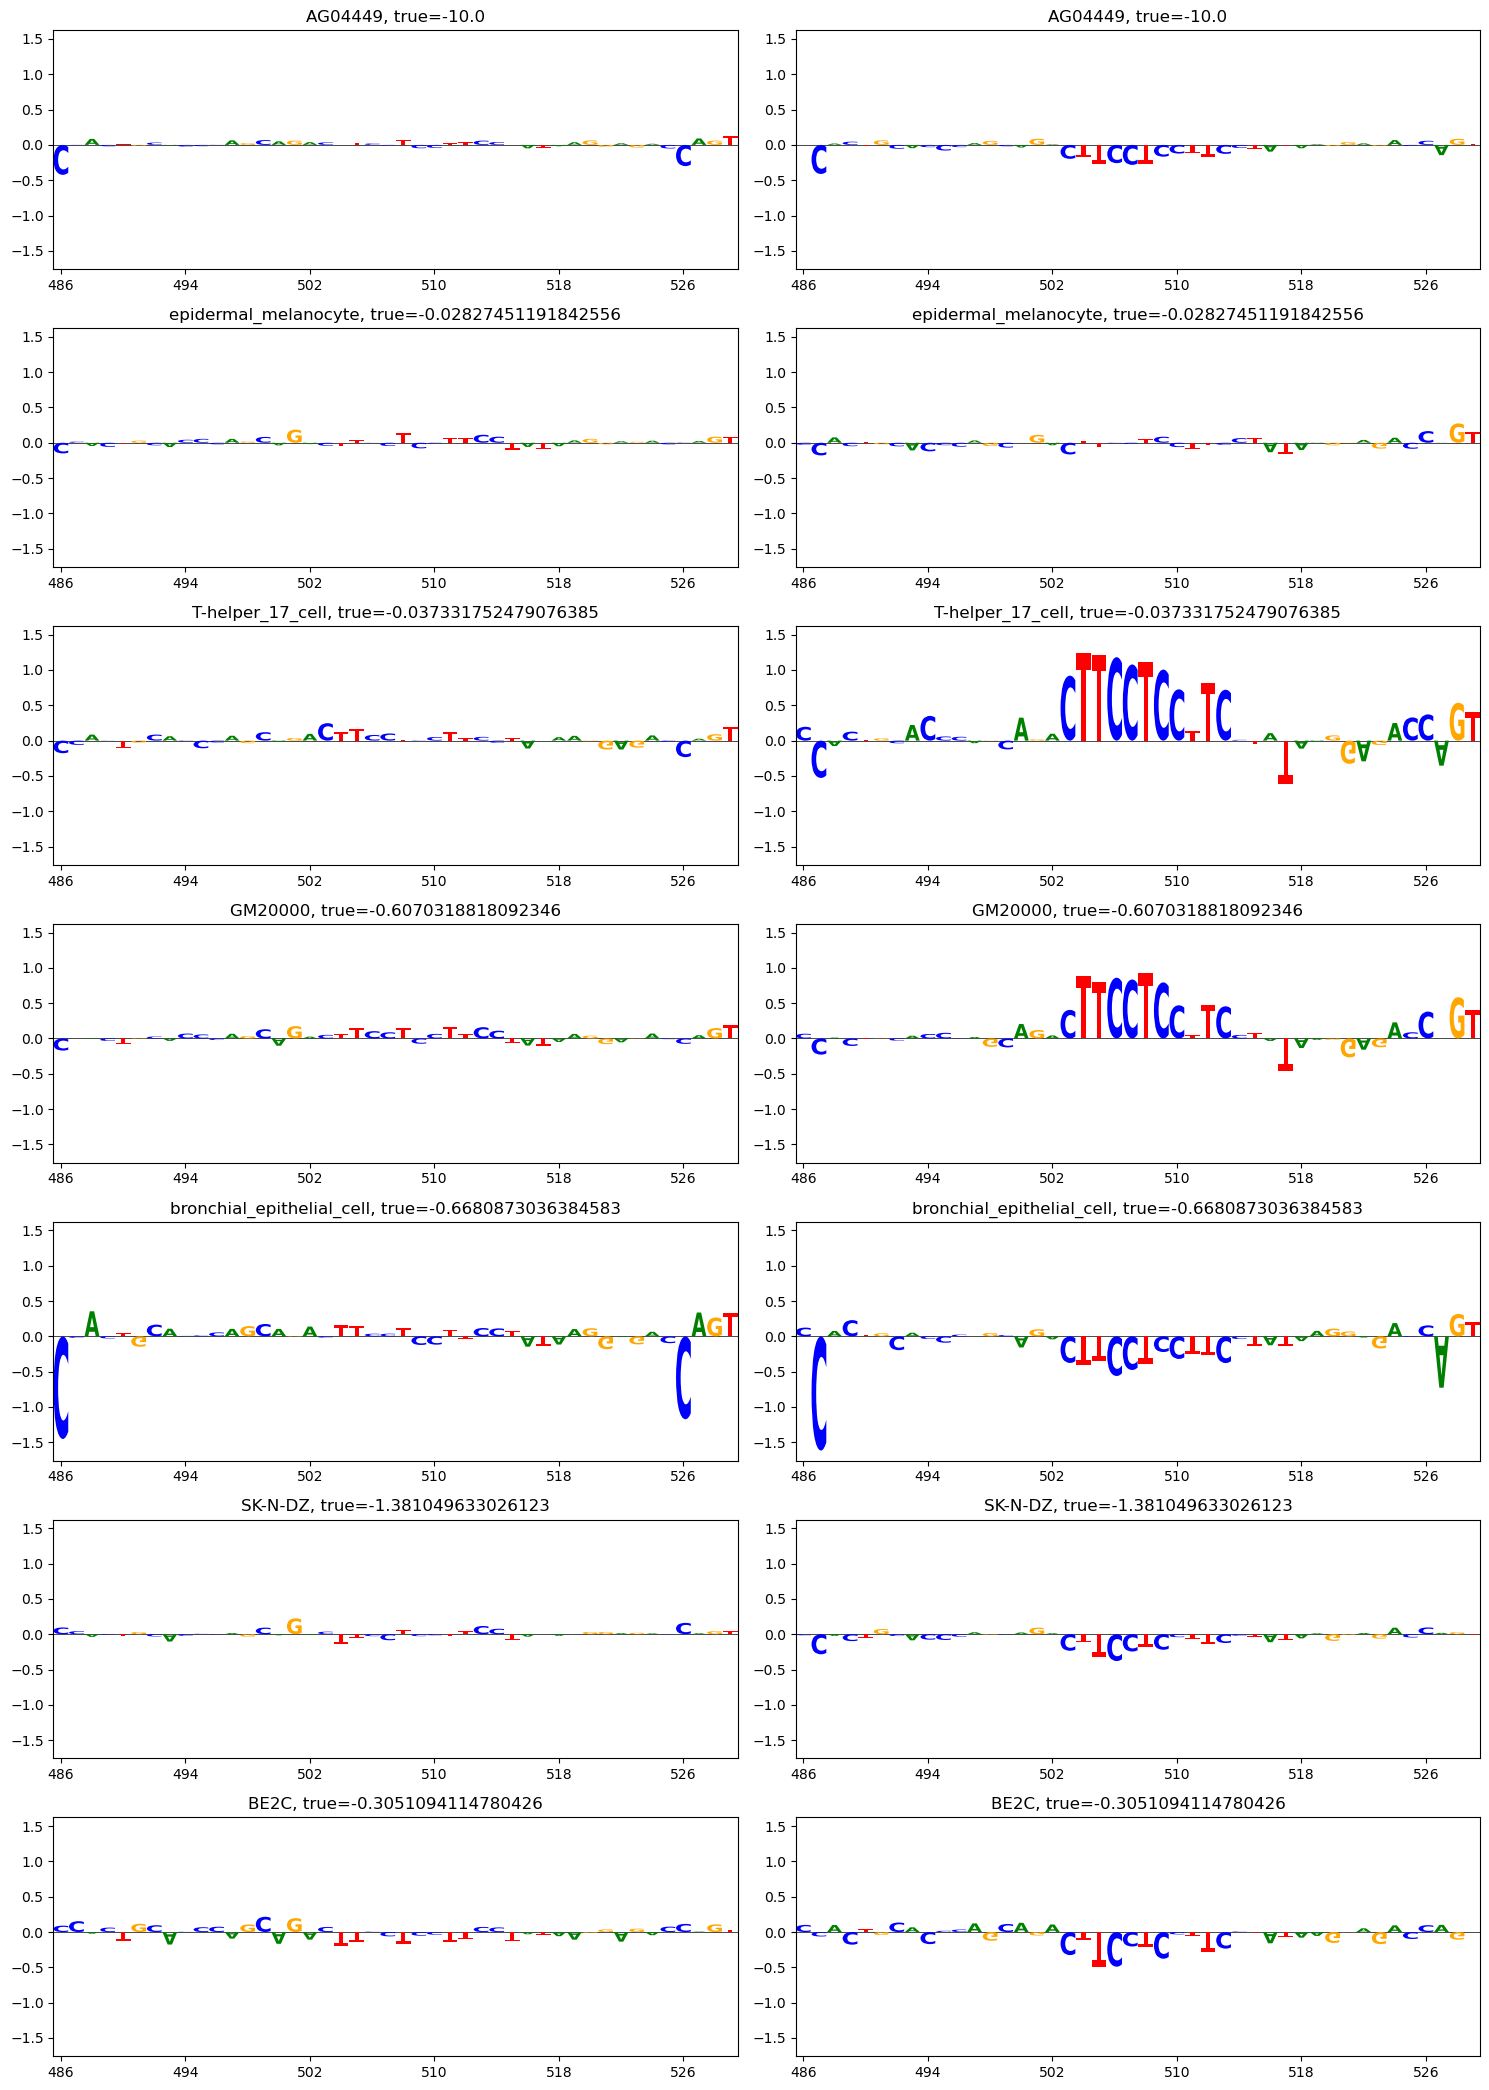

In [68]:
celltype_compare_logo([mult,ctst],idx, idxs, [mult_reg.sum(0), ctst_reg.sum(0)], startend=(486,530), true_values = true_values)
#this actually looks quite promising!

(array([90.,  0.,  0.,  0.,  0.,  0.,  2., 17., 36., 16.]),
 array([-10.        ,  -8.88752365,  -7.77504778,  -6.66257143,
         -5.55009508,  -4.43761921,  -3.32514286,  -2.21266651,
         -1.1001904 ,   0.01228585,   1.12476206]),
 <BarContainer object of 10 artists>)

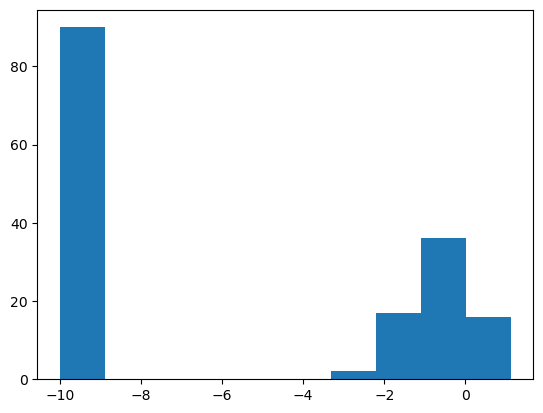

In [77]:
#let's look at another one that is extremely variable!
idx = 757776
true_values = mult.dataset[idx][1][1] #the first 1 is results, then the second 1 is regression
plt.hist(true_values)

In [78]:
#let's find the ones that we have that are the most variable
#first use os to get a list of all files that are dir that start with ctst
dir_train = '/data/leslie/sarthak/hyena/hyena-dna/shap_analysis/most_variable_cCREs2/train/'
import os
import glob
pattern = f"{dir_train}/ctst*"
files_starting_with_ctst = glob.glob(pattern)

print(files_starting_with_ctst)

['/data/leslie/sarthak/hyena/hyena-dna/shap_analysis/most_variable_cCREs2/train/ctst_bestepoch_546685_reg.npy', '/data/leslie/sarthak/hyena/hyena-dna/shap_analysis/most_variable_cCREs2/train/ctst_bestepoch_811605_reg.npy', '/data/leslie/sarthak/hyena/hyena-dna/shap_analysis/most_variable_cCREs2/train/ctst_bestepoch_848052_reg.npy', '/data/leslie/sarthak/hyena/hyena-dna/shap_analysis/most_variable_cCREs2/train/ctst_bestepoch_836691_class.npy', '/data/leslie/sarthak/hyena/hyena-dna/shap_analysis/most_variable_cCREs2/train/ctst_bestepoch_430328_reg.npy', '/data/leslie/sarthak/hyena/hyena-dna/shap_analysis/most_variable_cCREs2/train/ctst_bestepoch_89387_reg.npy', '/data/leslie/sarthak/hyena/hyena-dna/shap_analysis/most_variable_cCREs2/train/ctst_bestepoch_748535_reg.npy', '/data/leslie/sarthak/hyena/hyena-dna/shap_analysis/most_variable_cCREs2/train/ctst_bestepoch_612869_class.npy', '/data/leslie/sarthak/hyena/hyena-dna/shap_analysis/most_variable_cCREs2/train/ctst_bestepoch_651607_class.n

In [79]:
print(len(files_starting_with_ctst))

270


In [80]:
import re
pattern = re.compile(r'.*_(\d+)_class|.*_(\d+)_reg')

# Set to store unique numbers
unique_numbers = set()

for path in files_starting_with_ctst:
    match = pattern.search(path)
    if match:
        # Groups are returned in the order they are defined in the pattern.
        # Since our pattern could match either '_class' or '_reg', we check which group was matched.
        number = match.group(1) if match.group(1) else match.group(2)
        unique_numbers.add(int(number))

print(unique_numbers)

{605184, 729601, 384001, 612869, 716808, 715789, 847887, 53776, 380945, 804382, 150053, 742951, 459818, 687149, 675886, 421939, 811061, 51254, 769590, 806971, 290876, 792639, 84551, 742472, 372812, 845390, 755279, 641105, 836691, 811605, 405077, 82520, 520290, 830052, 694377, 507498, 855660, 804977, 53372, 26238, 612991, 211585, 395907, 700558, 662160, 281234, 641682, 355989, 365211, 569501, 109218, 614565, 829103, 384688, 425650, 848052, 466101, 855738, 83134, 720063, 353473, 450755, 765638, 849095, 570573, 573135, 796881, 504018, 645332, 501973, 839903, 767715, 673512, 768748, 343789, 682226, 430328, 296697, 300290, 819971, 606978, 36101, 709385, 509706, 609545, 719631, 638735, 88337, 814870, 776987, 805668, 603942, 89387, 748535, 824116, 586552, 660281, 174906, 753977, 847161, 784202, 677197, 439637, 651607, 840025, 638811, 218978, 92003, 446822, 823658, 803185, 753522, 486780, 546685, 585604, 811406, 726930, 784800, 752545, 104866, 783781, 318379, 484780, 677806, 500659, 423350, 85

In [82]:
print(len(unique_numbers))
#so should be 270/2 because class and reg, and indeed it is, now that we have the numbers, let's now find the highest variance once
for num in unique_numbers:
    print(mult.var(num))

135
13.909831619182984
13.924703133645274
13.915892469325525
13.920807732690157
13.891274623243838
13.892980401396496
13.901403688982532
13.922477611617424
13.918888674052099
13.929646702796976
13.924964077628685
13.931112259888678
13.912562445167422
13.909672956169615
13.927310626778446
13.892532092124375
13.910749743300856
13.904465286877123
13.908630220028849
13.933147897733162
13.910299792979531
13.915533638323033
13.9142343368522
13.894590962343624
13.900385170561908
13.899754574949215
13.904841098726301
13.920767851107055
13.924362205076363
13.900363996553848
13.90304803990253
13.90773877101141
13.923780979303938
13.912666180940725
13.922489364989787
13.903597712838943
13.920232776721498
13.912361182453528
13.902436057017066
13.906359277572829
13.921161698413437
13.903622970889865
13.912995045605133
13.895199968299641
13.912464689121943
13.933659330644739
13.9263064174193
13.932189190834631
13.913677094061686
13.917840259967985
13.908290910289379
13.913851524427315
13.91292028627

In [ ]:
#ok, it seems that the ones we're looking at are actually the lowest variance and it builds up,will take forever, so not worth dealing with for now

# lots of directions

one way is to find hits genome wide both positive and negative, don't want to look everywhere, just the stripes models think are important, then do a correlation with the accessability, like if you sum across that stripe, see if it's positive or negative motif, if the values or change in them correspond to the change in accessability, shows they're driving accessability

When it's closed expect to see 0 or positive contribution (which we then multiply by -1 to show it's repressive)

When it's open, expect to see negative contributions

look at the top hits for each sequence, sweep it across and look at your scores, then resport the top positives and top negatives for that.

Can find the hits of all the motifs and my own hits and compare, then compare the hits from the two models.

Good to do this analysis, then we can look at ouir best matches that best match accessibility profiles positive and negatives. TFModisco might be abs, it mostly only looks at positive things. If see good positive one, shows it's positively influencing it, if negative it's opposite, but people usually just show the hits regardless of the sign. See if it considers the negative motifs. See how modisco handles this to be positive and negative.

Hypothetical is because have it one hot encoded, can use that, we don't do that, so don't touch it. Even when it's A, thre's hypothetical stuff.